# I] Import functions and options

In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
import statsmodels.sandbox.stats.multicomp
from statsmodels.sandbox.stats.multicomp import multipletests

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [4]:
path = output_file_directory + "ATG7/TCGA_GTEX/all_filtered_tissues/"

# II] Data download

In [5]:
path2 = 'dataframes_for_input/'

In [6]:
%%time
# DL data ATG7 isoform expression
df_ATG7_Normal = pandas.read_csv(path+path2+'df_ATG7_Normal_filtered.csv', sep = ",")
df_ATG7_Primary = pandas.read_csv(path+path2+'df_ATG7_Primary_filtered.csv', sep = ",")

#remove Survival information
dfs = df_ATG7_Normal, df_ATG7_Primary
for df in dfs:
    df.drop(df.columns[[3, 4]], axis = 1, inplace = True)

print(df_ATG7_Normal.shape)
df_ATG7_Normal.head(2)

(3753, 17)
Wall time: 79.8 ms


sample    Sample_Type   Primary_Site      ATG7    ATG7_1  \
0  GTEX-132AR-1726-SM-5EGHQ  Normal Tissue  Adrenal Gland  4.558498  2.996009   
1   GTEX-U4B1-0126-SM-4DXSN  Normal Tissue  Adrenal Gland  4.364710  3.132488   

     ATG7_2    ATG7_3   ATG7_tpm  ATG7_1tpm  ATG7_2tpm  ATG7_3tpm  \
0  2.021477  0.879716  22.563767   6.977902   3.059994   0.840013   
1  2.210724  0.963466  19.601965   7.769460   3.629077   0.949989   

   ATG7_prot_tot  ATG7_1perc  ATG7_2perc  ATG7_3perc  ATG7_1norm  ATG7_2norm  
0      10.877908   64.147459   28.130349    7.722192    0.309253    0.135615  
1      12.348525   62.918120   29.388745    7.693134    0.396361    0.185138

# III] ATG7 expression per tissues

In [7]:
path2 = 'figs_ATG7_characterisation/'

## A) ATG7 isoform percentage

## 1. Per tissue

In [8]:
#heatmap data preparation
dfs = df_ATG7_Normal, df_ATG7_Primary
infos = 'normal tissue', 'primary tumor'

df_sampletype_l  = []

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    print(info.upper())
    
    ##select columns
    df_sampletype = df[['Primary_Site','ATG7_tpm','ATG7_1tpm','ATG7_2tpm',
                             'ATG7_1perc','ATG7_2perc','ATG7_3perc']]
    
    ##Column rename
    df_sampletype = df_sampletype.rename(columns = {'Primary_Site' : 'Primary Site', 
                                                    'ATG7_tpm': 'tpm ATG7',
                                                    'ATG7_1tpm': 'tpm ATG7(1)',
                                                    'ATG7_2tpm': 'tpm ATG7(2)',
                                                    'ATG7_1perc' : "% ATG7(1)",
                                                    'ATG7_2perc' : "% ATG7(2)",
                                                    'ATG7_3perc' : "% ATG7(3)"})
       
    ##Groupby to have merge of all the primary site 
    df_sampletype= df_sampletype.groupby('Primary Site').agg(numpy.mean)
    df_sampletype = df_sampletype.round(2)
    
    ##save_df in a list
    df_sampletype_l.append(df_sampletype)
    print()
    print(df_sampletype.iloc[:,:3].head())
    print('_______________________________________________________________________')    
    

df_sampletype_normal = df_sampletype_l[0]
df_sampletype_primary = df_sampletype_l[1]

NORMAL TISSUE

               tpm ATG7  tpm ATG7(1)  tpm ATG7(2)
Primary Site                                     
Adrenal Gland     11.99         6.32         1.63
Brain              9.47         6.63         0.40
Breast            12.68         7.06         1.22
Colon              9.70         5.68         0.84
Esophagus         10.90         5.58         1.50
_______________________________________________________________________
PRIMARY TUMOR

               tpm ATG7  tpm ATG7(1)  tpm ATG7(2)
Primary Site                                     
Adrenal Gland     12.97         8.58         1.06
Brain             17.59        11.24         1.22
Breast            18.47         8.00         4.05
Colon             14.30         5.60         3.05
Esophagus         14.92         5.69         3.13
_______________________________________________________________________


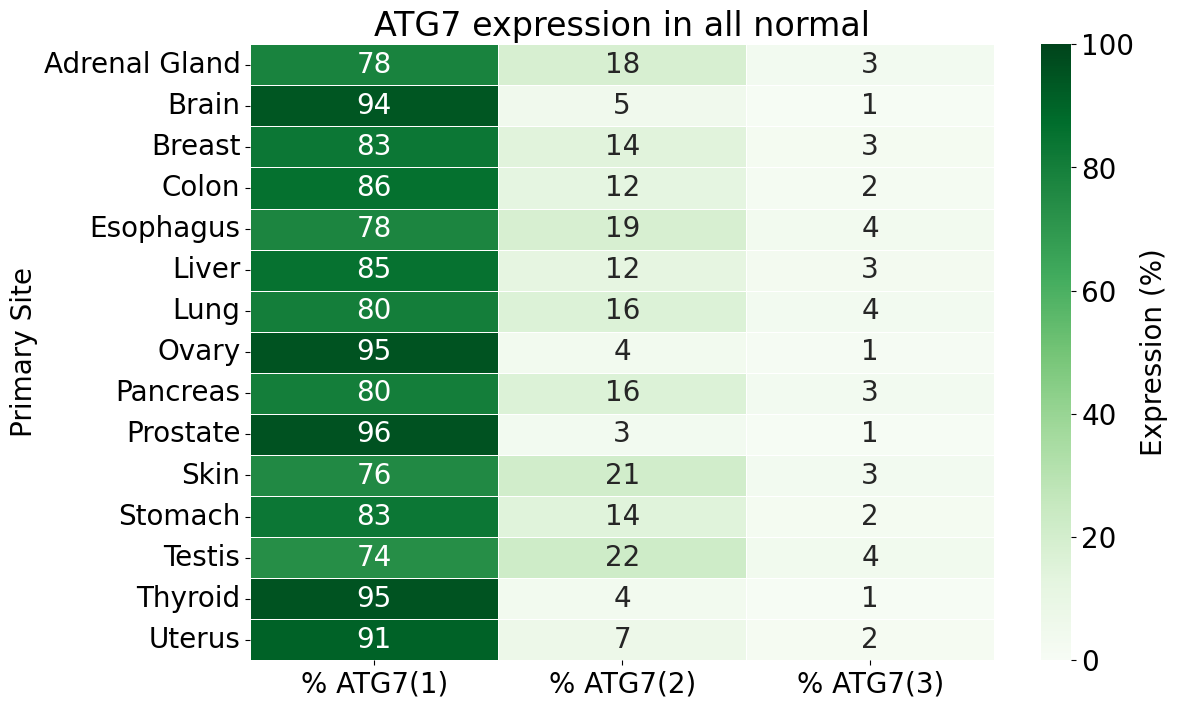

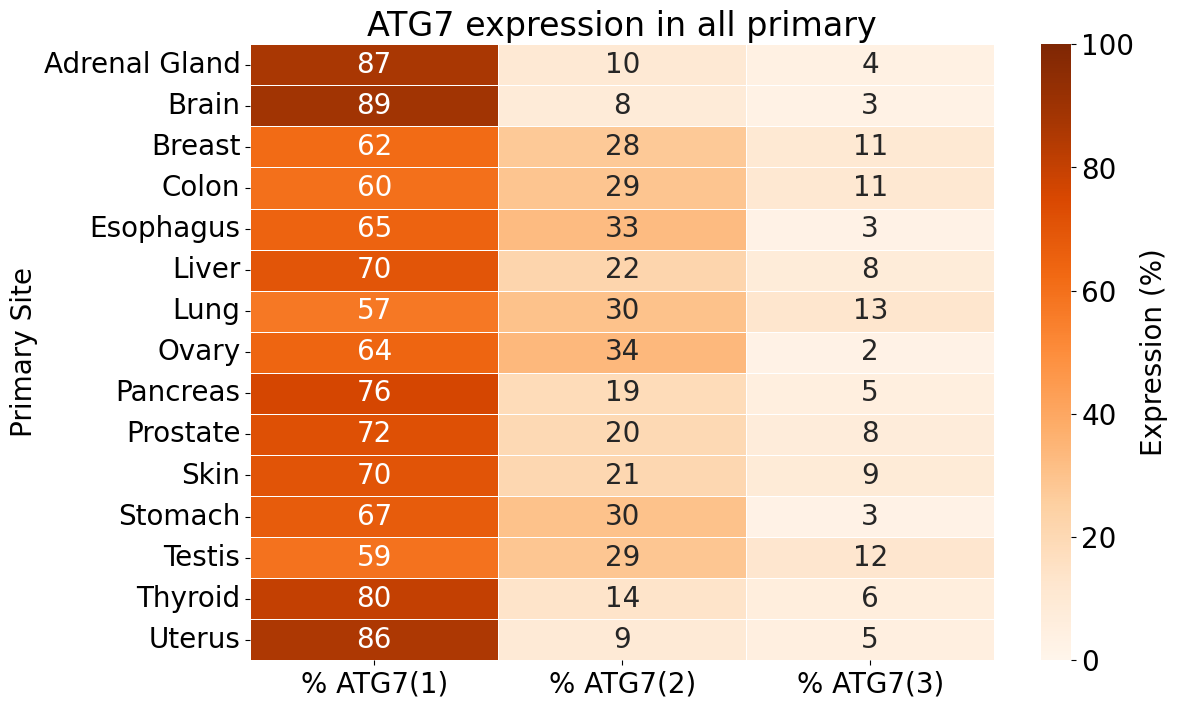

<Figure size 1200x800 with 0 Axes>

In [9]:
#heatmap percentage
dfs = df_sampletype_normal, df_sampletype_primary
infos = 'normal', 'primary'
colors = 'Greens', 'Oranges'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    color = colors[i]

    HeatMap_df = df[['% ATG7(1)', '% ATG7(2)', '% ATG7(3)']]
    heatmap = seaborn.heatmap(HeatMap_df, annot=True, cmap= color, linewidths=.5,
                              vmin=0, vmax=100, fmt='.0f',
                              cbar_kws={'label': 'Expression (%)'})
    plt.title('ATG7 expression in all ' + info)
    
    name = 'heatmap_organs_' + info + '_thesis'
    plt.savefig(path+path2+name+'.svg')
    plt.show()
    plt.clf()

## 2. Global, all tissues

In [10]:
HeatMap_df_norm = df_sampletype_normal[['% ATG7(1)', '% ATG7(2)', '% ATG7(3)']]
HeatMap_df_norm = HeatMap_df_norm.assign(Type = '_norm')

HeatMap_df_prim = df_sampletype_primary[['% ATG7(1)', '% ATG7(2)', '% ATG7(3)']]
HeatMap_df_prim = HeatMap_df_prim.assign(Type = '_prim')

HeatMap_df_final = pandas.concat([HeatMap_df_norm, HeatMap_df_prim], axis=0)
print(HeatMap_df_final)

               % ATG7(1)  % ATG7(2)  % ATG7(3)   Type
Primary Site                                         
Adrenal Gland      78.28      18.38       3.34  _norm
Brain              94.27       4.79       0.94  _norm
Breast             83.06      14.29       2.65  _norm
Colon              85.57      12.11       2.32  _norm
Esophagus          77.59      18.55       3.86  _norm
Liver              85.47      11.78       2.75  _norm
Lung               80.22      16.28       3.50  _norm
Ovary              95.05       3.72       1.23  _norm
Pancreas           80.41      16.31       3.28  _norm
Prostate           95.70       3.25       1.05  _norm
Skin               75.64      20.88       3.48  _norm
Stomach            83.16      14.47       2.37  _norm
Testis             73.56      22.22       4.23  _norm
Thyroid            95.16       3.86       0.97  _norm
Uterus             90.80       7.39       1.81  _norm
Adrenal Gland      86.53       9.86       3.60  _prim
Brain              88.73    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    Type variable  value
0  _norm  ATG7(1)  78.28
1  _norm  ATG7(1)  94.27
2  _norm  ATG7(1)  83.06
3  _norm  ATG7(1)  85.57
4  _norm  ATG7(1)  77.59


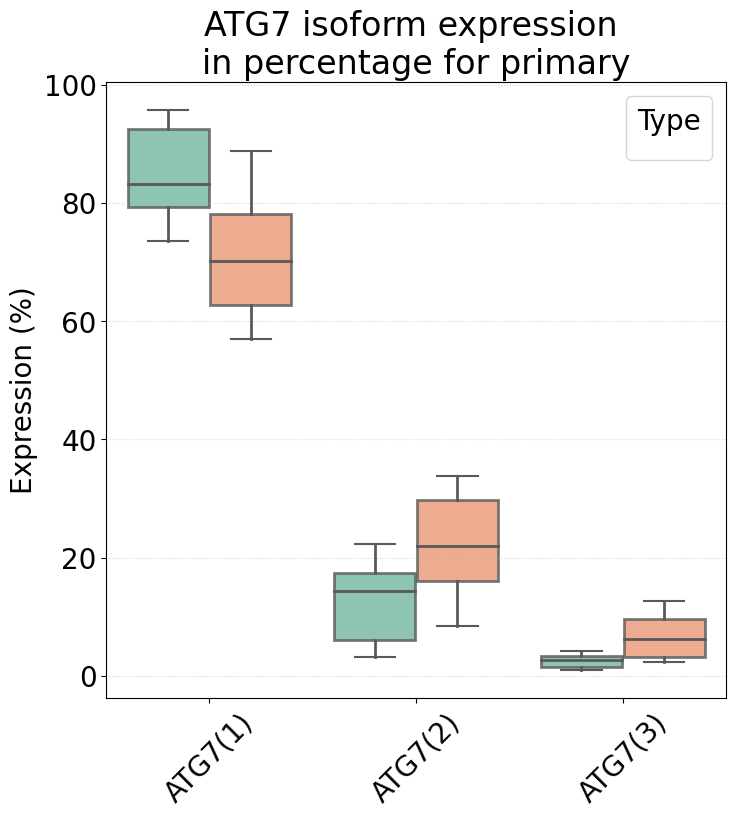

In [11]:
# From wide to long dataframe
df_perc_all = HeatMap_df_final.melt(id_vars=["Type"])
df_perc_all['variable'] = df_perc_all['variable'].str.split(' ', expand=True)[1]
print(df_perc_all.head())

#graph
plt.figure(figsize=(8, 8))
seaborn.boxplot(data = df_perc_all, x="variable", y="value", hue= 'Type', palette = 'Set2',
                boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, 
                whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.title(f'ATG7 isoform expression \nin percentage for {info}')
plt.ylabel('Expression (%)')
plt.xlabel('')
plt.xticks(rotation = 45)
#save
name = f'boxplot_percentage_{info}'
plt.savefig(path+path2+name+'_thesis.svg')
plt.show()

## B) ATG7 isoform expression per tissue

In [12]:
df_tissue_list = []
for df in df_ATG7_Normal, df_ATG7_Primary:
    df_tissues = df[['Primary_Site','ATG7_1tpm','ATG7_2tpm']]

    ##Column rename
    df_tissues = df_tissues.rename(columns = {'Primary_Site' : 'Primary Site', 
                                              'ATG7_1tpm': 'ATG7(1)',
                                              'ATG7_2tpm': 'ATG7(2)'})
    df_tissues = df_tissues.sort_values('Primary Site')
    print(df_tissues.head(2), '\n')
    df_tissue_list.append(df_tissues)

     Primary Site   ATG7(1)   ATG7(2)
0   Adrenal Gland  6.977902  3.059994
88  Adrenal Gland  6.510545  0.869973 

     Primary Site   ATG7(1)   ATG7(2)
0   Adrenal Gland  9.440395  3.738901
28  Adrenal Gland  6.610603  1.310029 



In [13]:
df_tissue_means_list = []
for df in df_tissue_list[0], df_tissue_list[1]:
    tissue_list = []
    iso1_mean_list = []
    iso2_mean_list = []

    tissues = set( list(df["Primary Site"]) )

    for tissue in tissues:
        tissue_list.append(tissue)
        means_ = df[df['Primary Site'] == tissue].mean(numeric_only=True)  
        iso1_mean_list.append(means_[0])
        iso2_mean_list.append(means_[1])

    dicc = dict(tissue = tissue_list, ATG7_1 = iso1_mean_list, ATG7_2 = iso2_mean_list)
    df_tissue_means = pandas.DataFrame.from_dict(dicc, orient='columns')    
    print(df_tissue_means, '\n')
    df_tissue_means_list.append(df_tissue_means)

           tissue    ATG7_1    ATG7_2
0        Pancreas  3.245272  0.698880
1   Adrenal Gland  6.322978  1.630889
2            Skin  8.115707  2.336557
3        Prostate  7.314179  0.266367
4           Colon  5.679204  0.840130
5         Stomach  4.573526  0.798832
6           Brain  6.625637  0.395617
7       Esophagus  5.579444  1.497797
8            Lung  8.127623  1.812889
9          Testis  9.631079  3.343787
10        Thyroid  7.342081  0.313027
11         Breast  7.057720  1.220215
12         Uterus  9.143782  0.754639
13          Liver  2.898318  0.569950
14          Ovary  7.554740  0.307953 

           tissue     ATG7_1    ATG7_2
0        Pancreas   8.734749  2.297821
1   Adrenal Gland   8.577514  1.057362
2            Skin   7.274129  2.428114
3        Prostate   6.783666  2.137845
4           Colon   5.597673  3.045450
5         Stomach   5.290163  2.840861
6           Brain  11.242078  1.216186
7       Esophagus   5.685302  3.129937
8            Lung   5.686425  3.338773


In [14]:
# Find min and max
## Iso1
infos = 'normal', 'primary'

for i in range(len(df_tissue_means_list)):
    df = df_tissue_means_list[i]
    info = infos[i]

    print('\n', info.upper())
    
    ## Iso1
    min_iso1 = round(df['ATG7_1'].min())
    max_iso1 = round(df['ATG7_1'].max())
    ## Iso2
    min_iso2 = round(df['ATG7_2'].min())
    max_iso2 = round(df['ATG7_2'].max())

    print(f'For ATG7(1), min is {min_iso1}, max is {max_iso1}')
    print(f'For ATG7(2), min is {min_iso2}, max is {max_iso2}')


 NORMAL
For ATG7(1), min is 3, max is 10
For ATG7(2), min is 0, max is 3

 PRIMARY
For ATG7(1), min is 5, max is 11
For ATG7(2), min is 1, max is 4


In [15]:
data = df_tissue_list[1].melt(id_vars=["Primary Site"], var_name="isoforms")
data

Primary Site isoforms     value
0      Adrenal Gland  ATG7(1)  9.440395
1      Adrenal Gland  ATG7(1)  6.610603
2      Adrenal Gland  ATG7(1)  8.298359
3      Adrenal Gland  ATG7(1)  8.537603
4      Adrenal Gland  ATG7(1)  7.689087
...              ...      ...       ...
10595         Uterus  ATG7(2)  3.941197
10596         Uterus  ATG7(2)  0.269931
10597         Uterus  ATG7(2)  0.670007
10598         Uterus  ATG7(2)  0.300034
10599         Uterus  ATG7(2)  0.530006

[10600 rows x 3 columns]

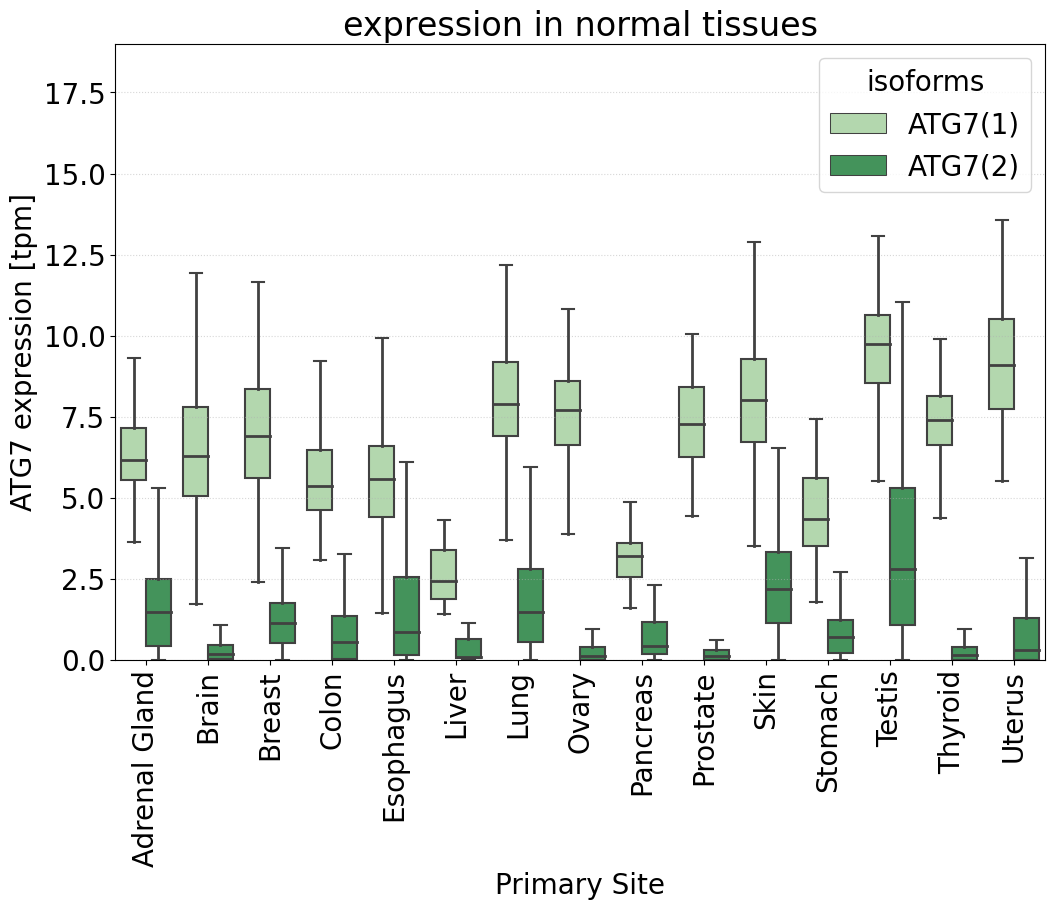

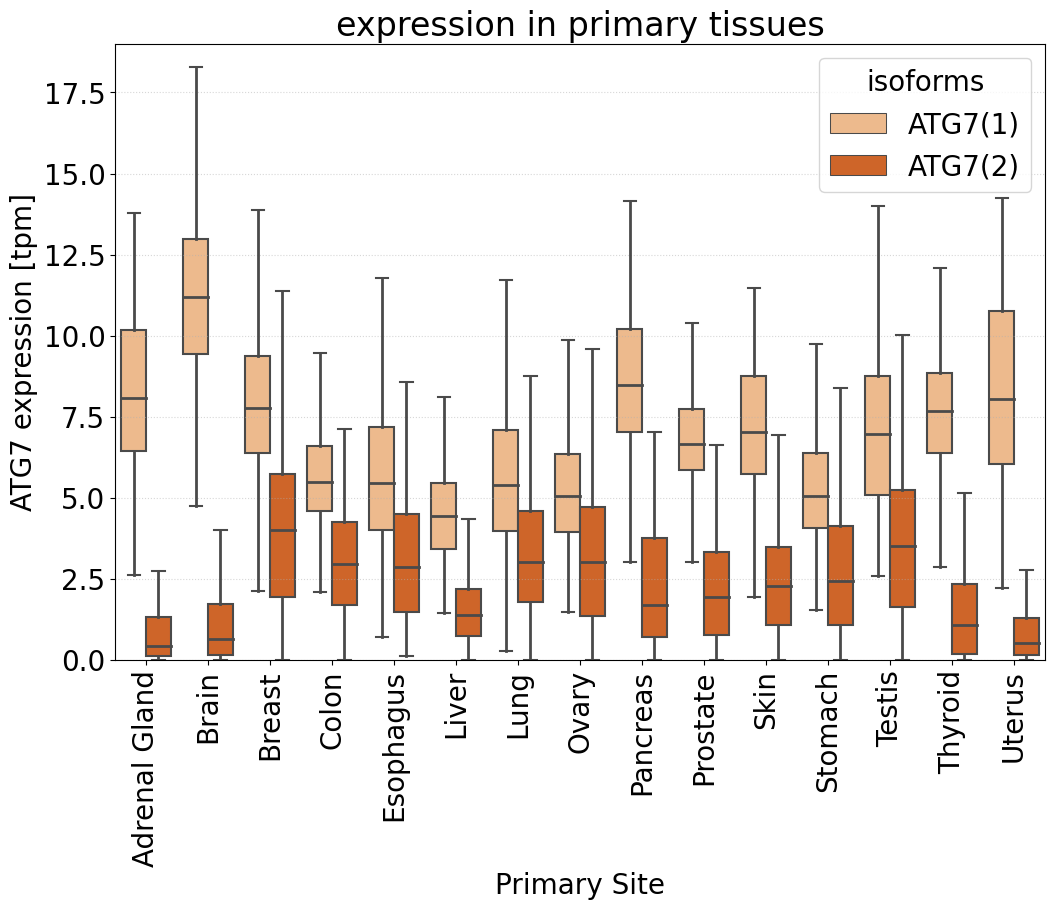

In [16]:
infos = 'normal', 'primary'
colors = 'Greens', 'Oranges'

for i in range(len(df_tissue_list)):
    df = df_tissue_list[i]
    color_ = colors[i]
    info = infos[i]
    
    data = df.melt(id_vars=["Primary Site"], var_name="isoforms")

    plt.tight_layout()

    seaborn.boxplot(data, y = 'value', x = 'Primary Site', hue = 'isoforms', 
                    medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False,
                    palette = color_)

    plt.title(f'expression in {info} tissues')
    plt.ylabel('ATG7 expression [tpm]')
    plt.ylim(0,19)
    plt.xticks(rotation = 90)

    name = f'boxplot_organs_tpm_{info}'
    plt.savefig(path+path2+name+'_thesis.svg')

    plt.show()

## C) Distribution of ATG7 in each tissue

ATG7


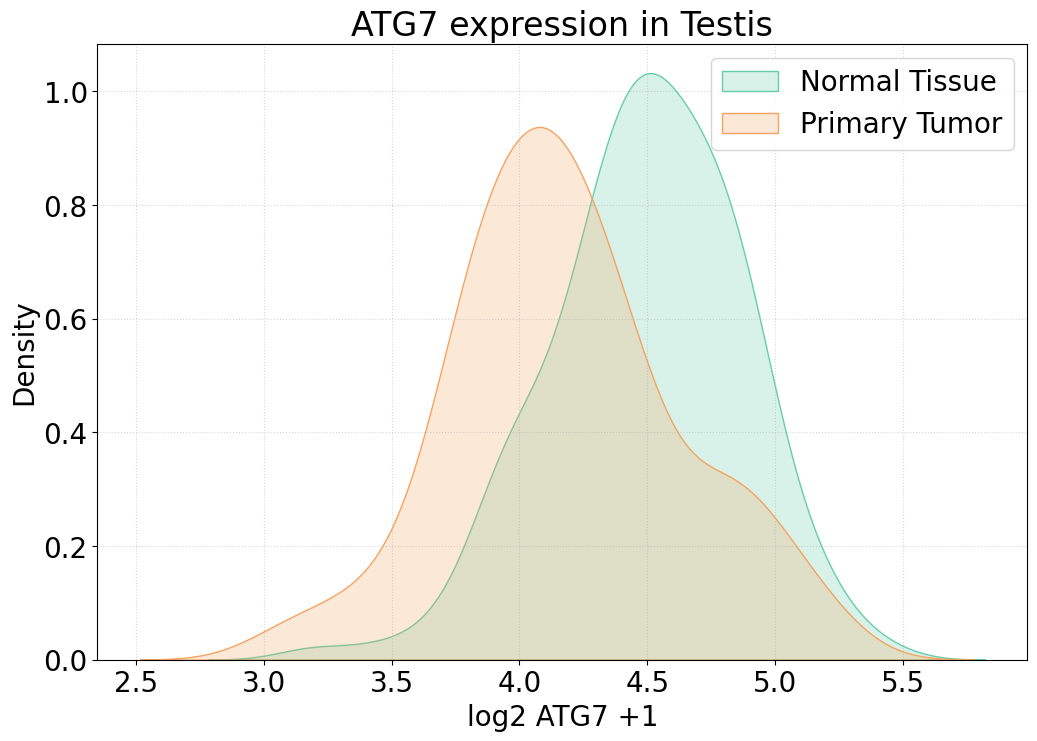

ATG7_1


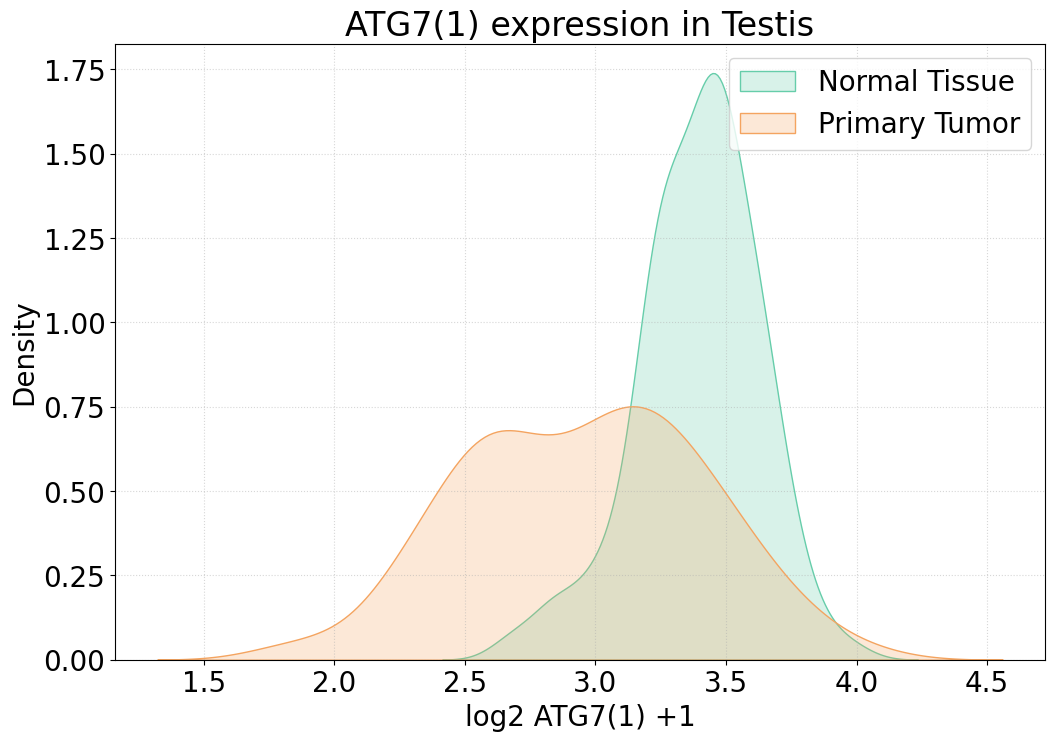

ATG7_2


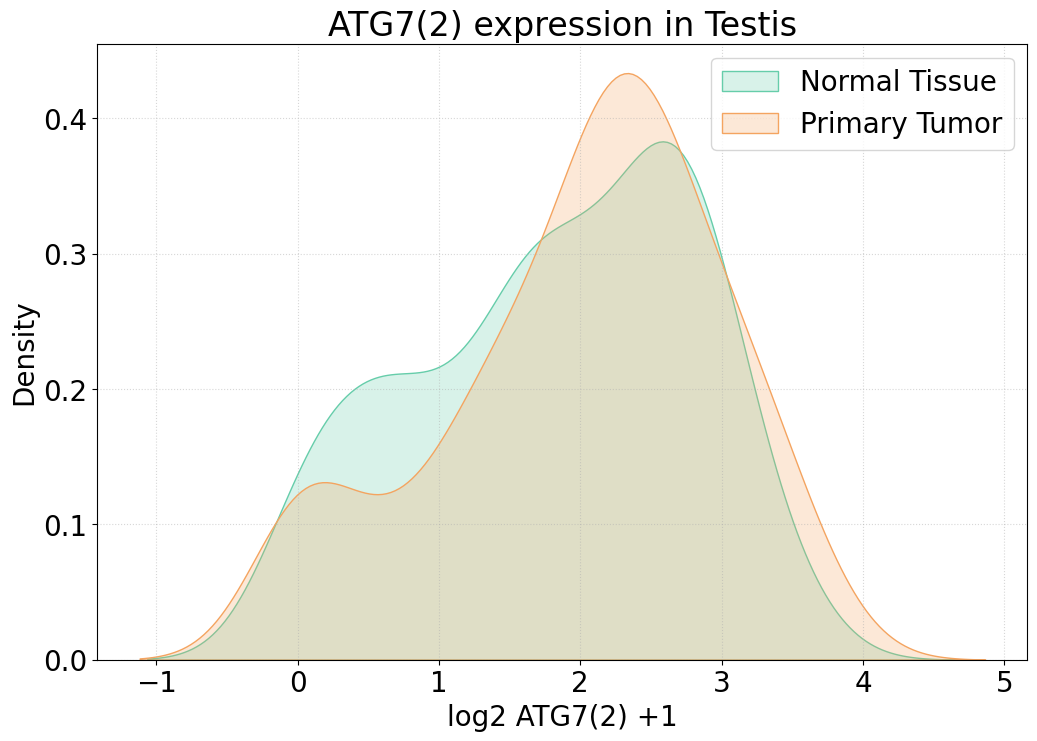

ATG7


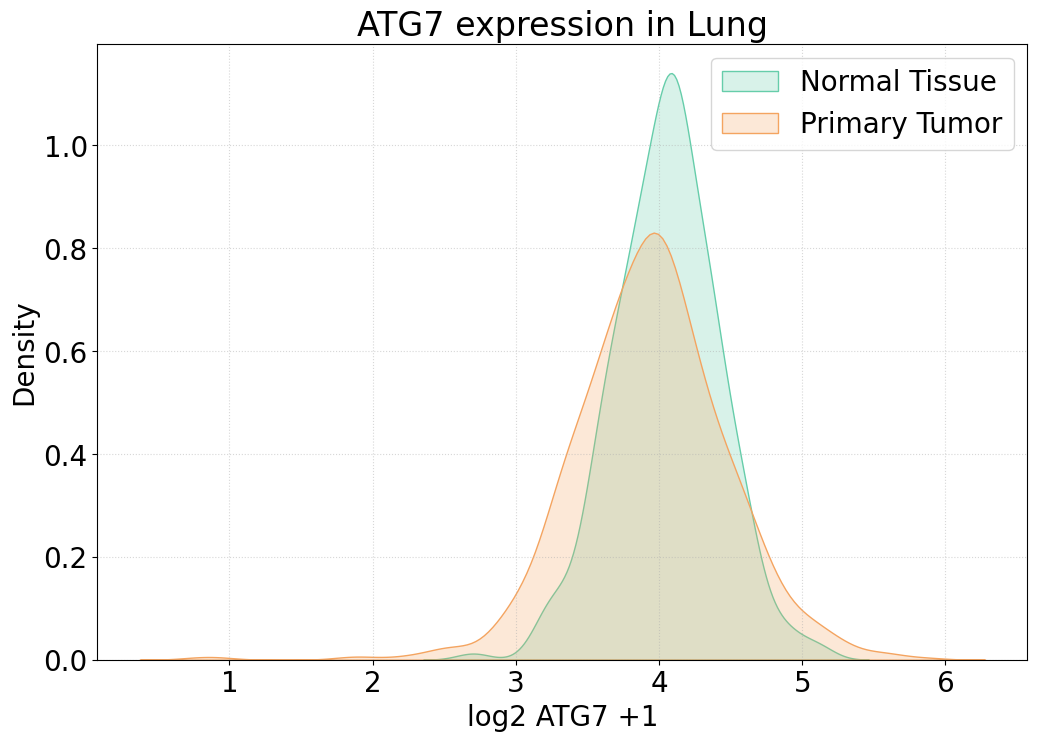

ATG7_1


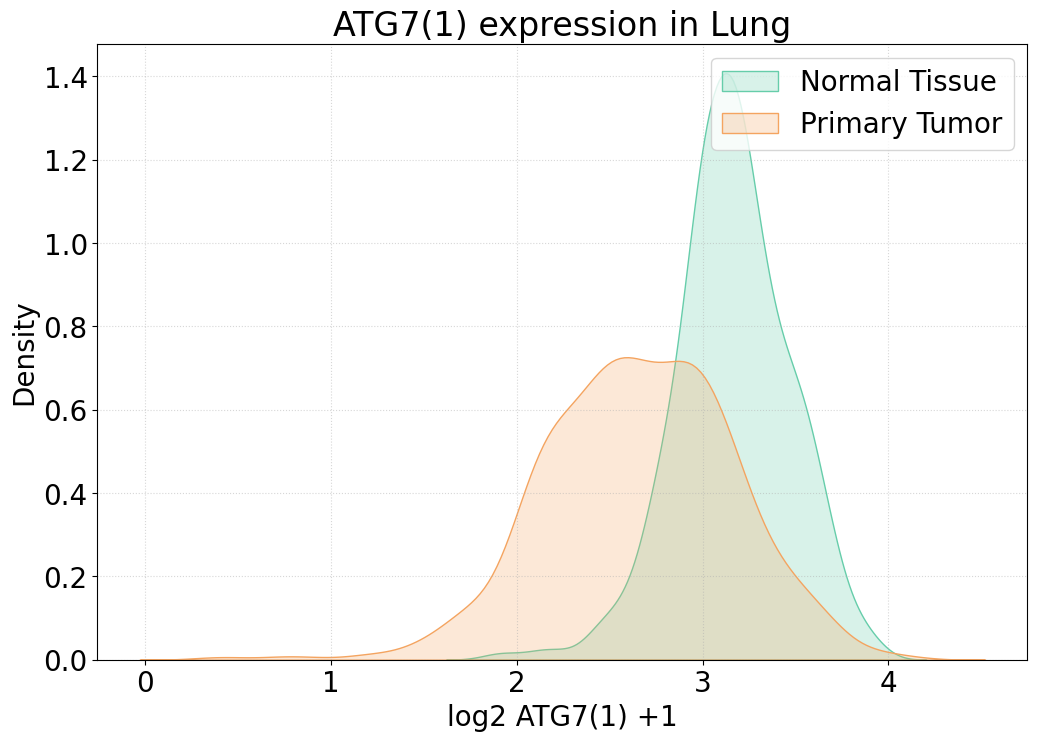

ATG7_2


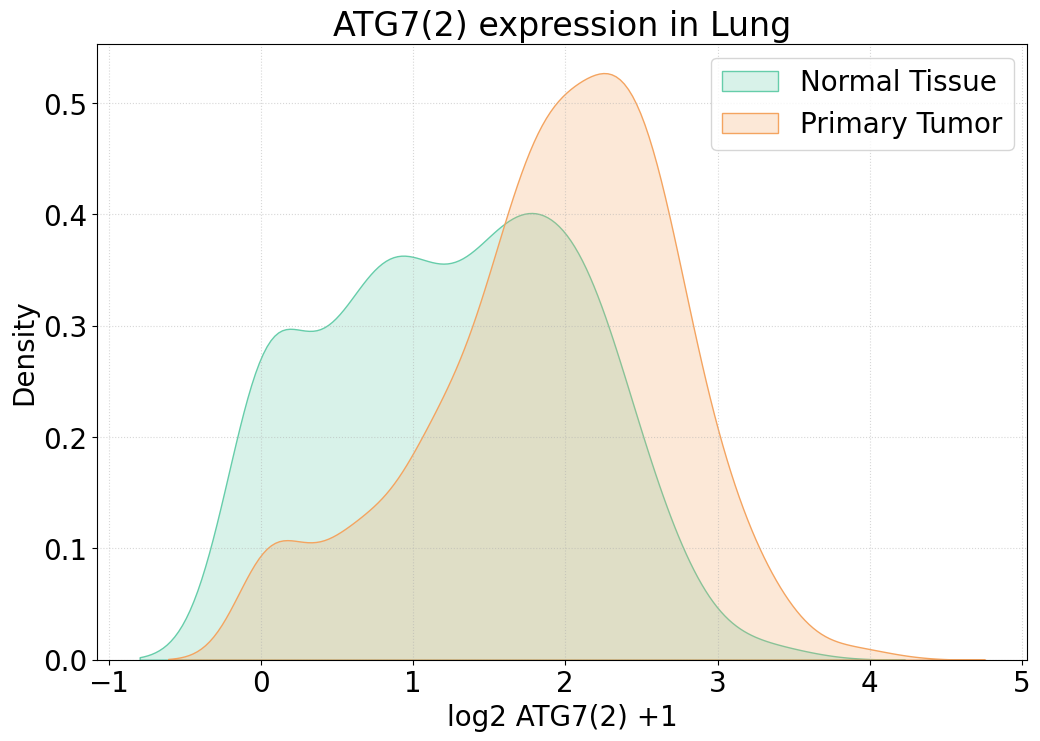

ATG7


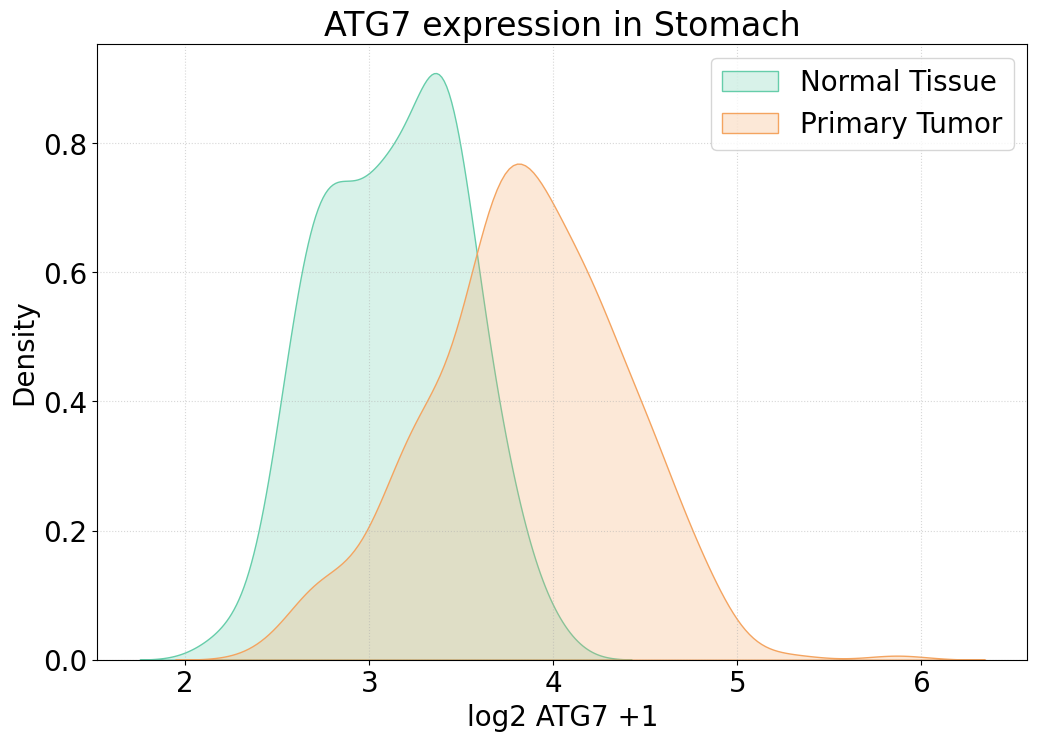

ATG7_1


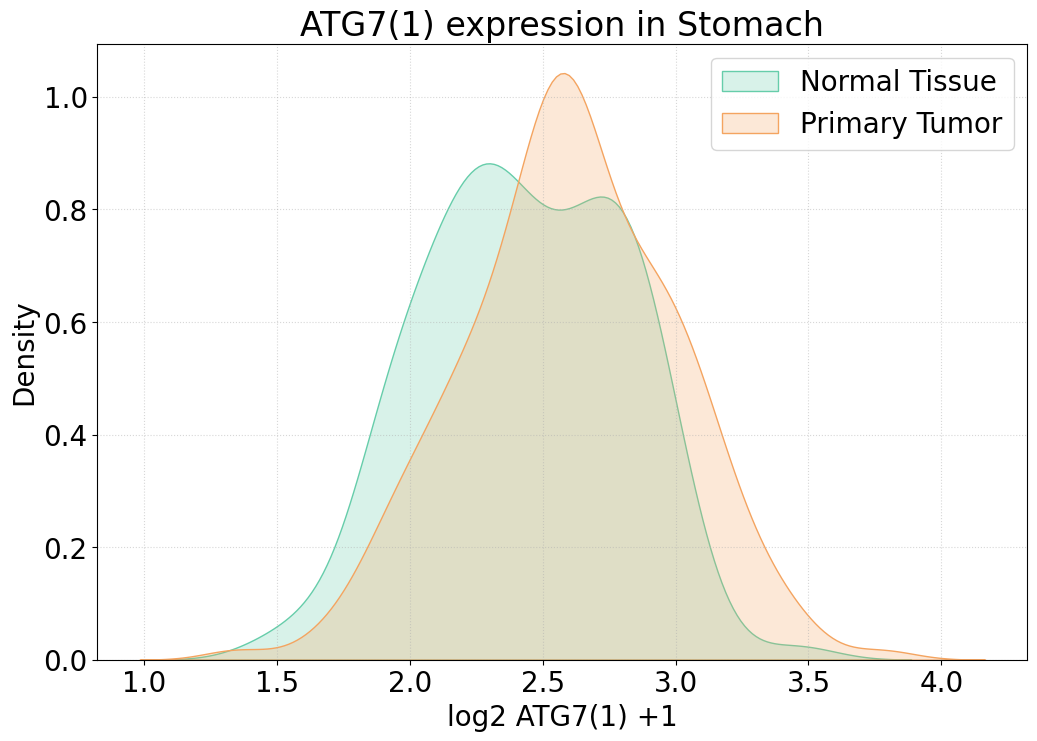

ATG7_2


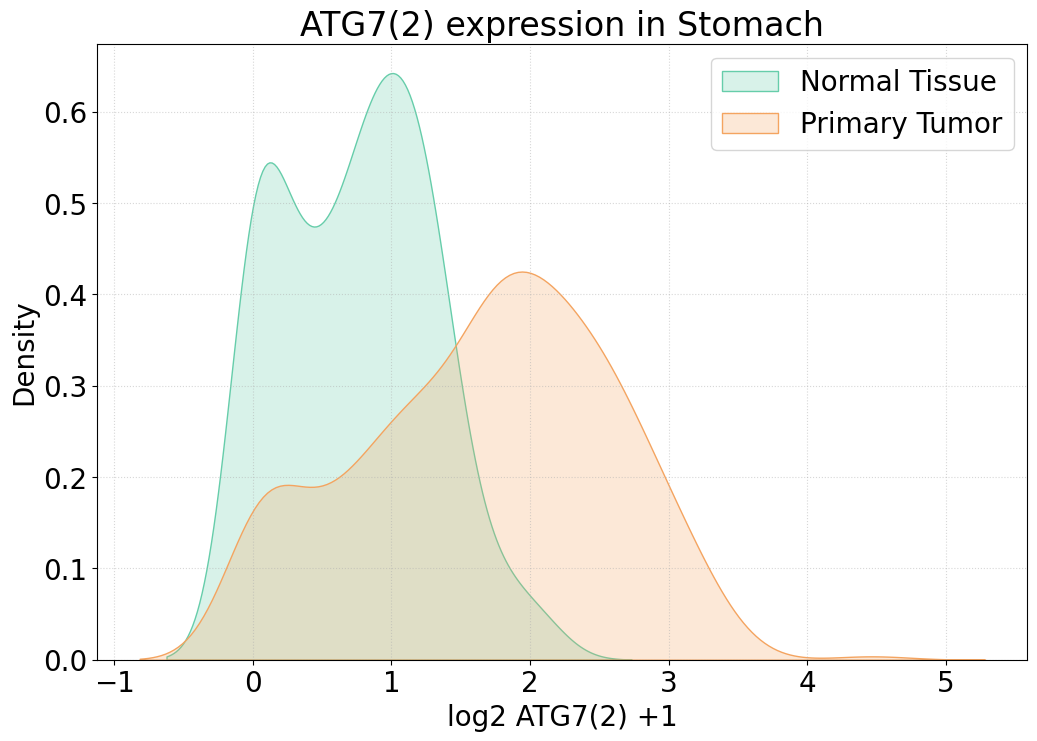

ATG7


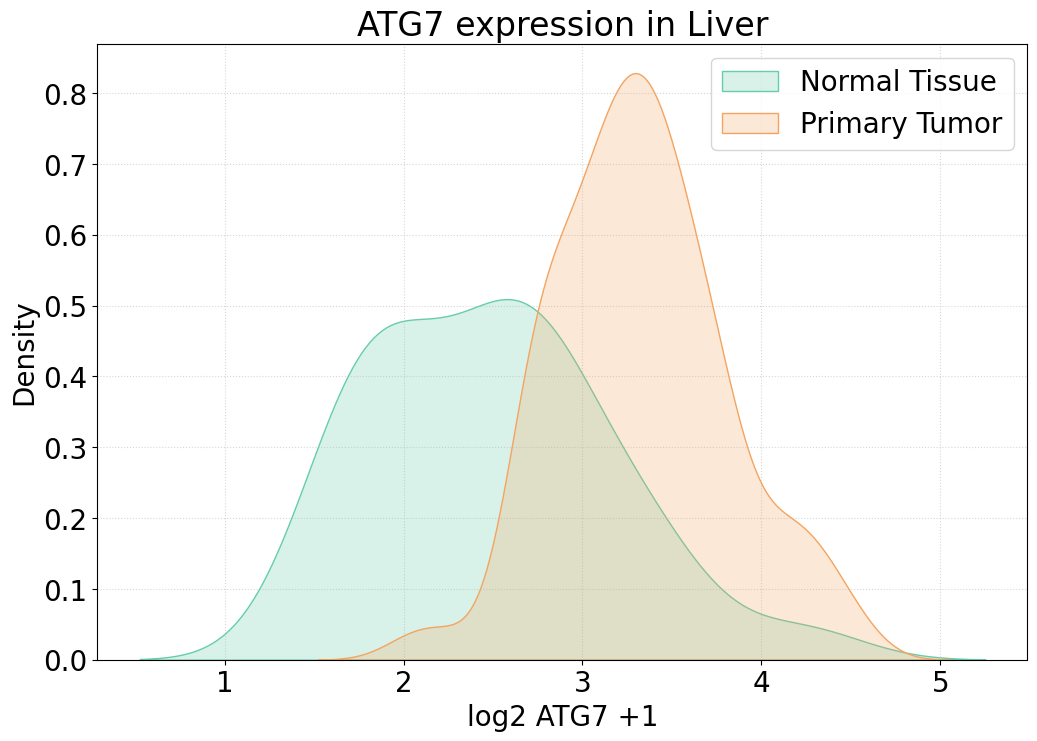

ATG7_1


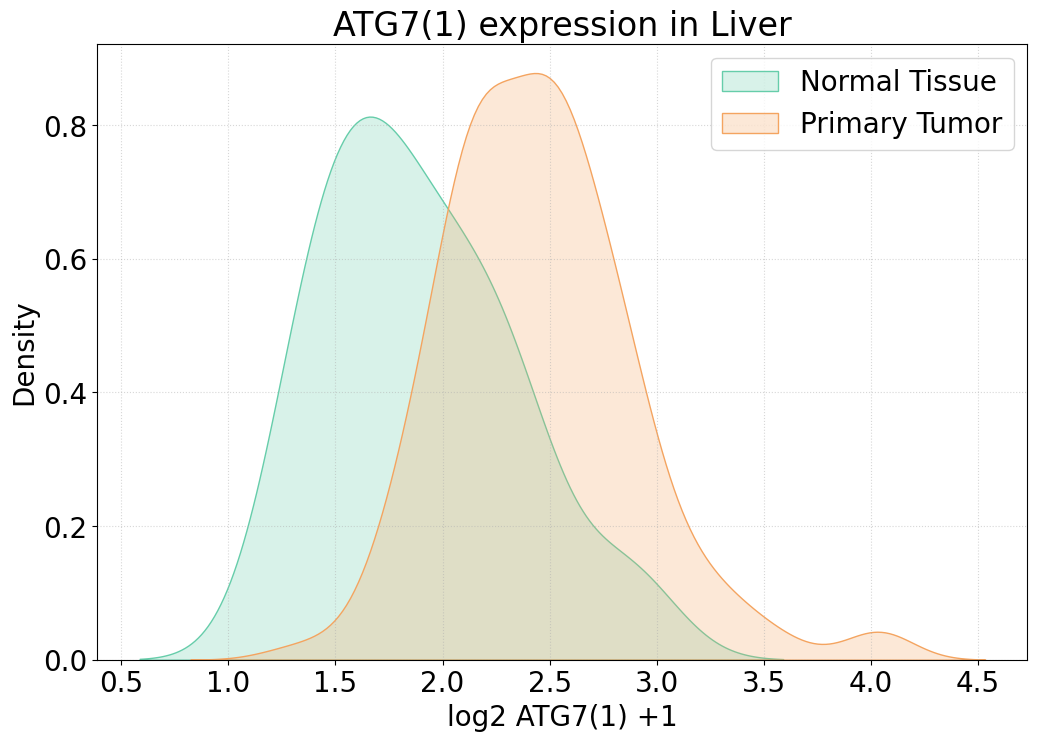

ATG7_2


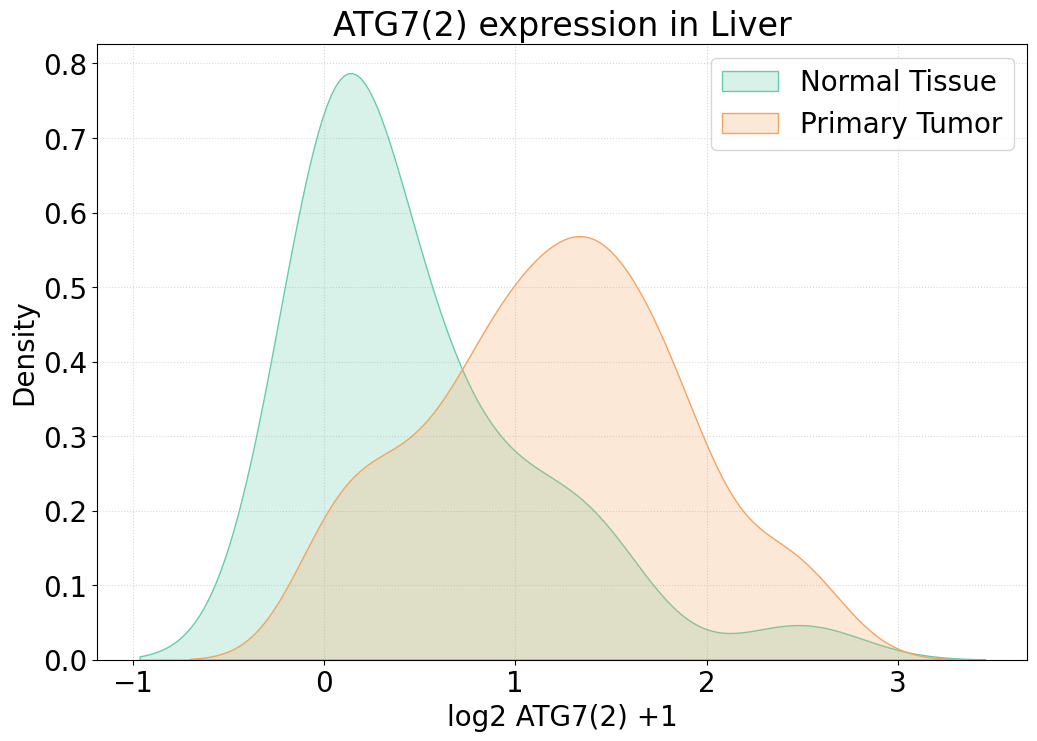

ATG7


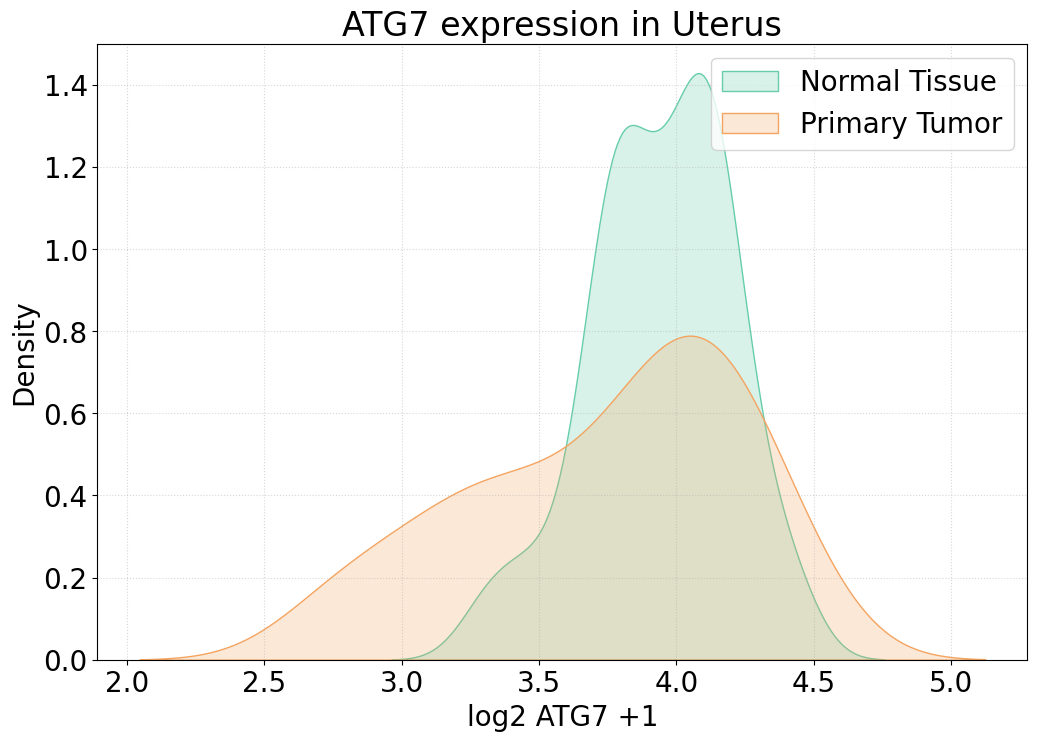

ATG7_1


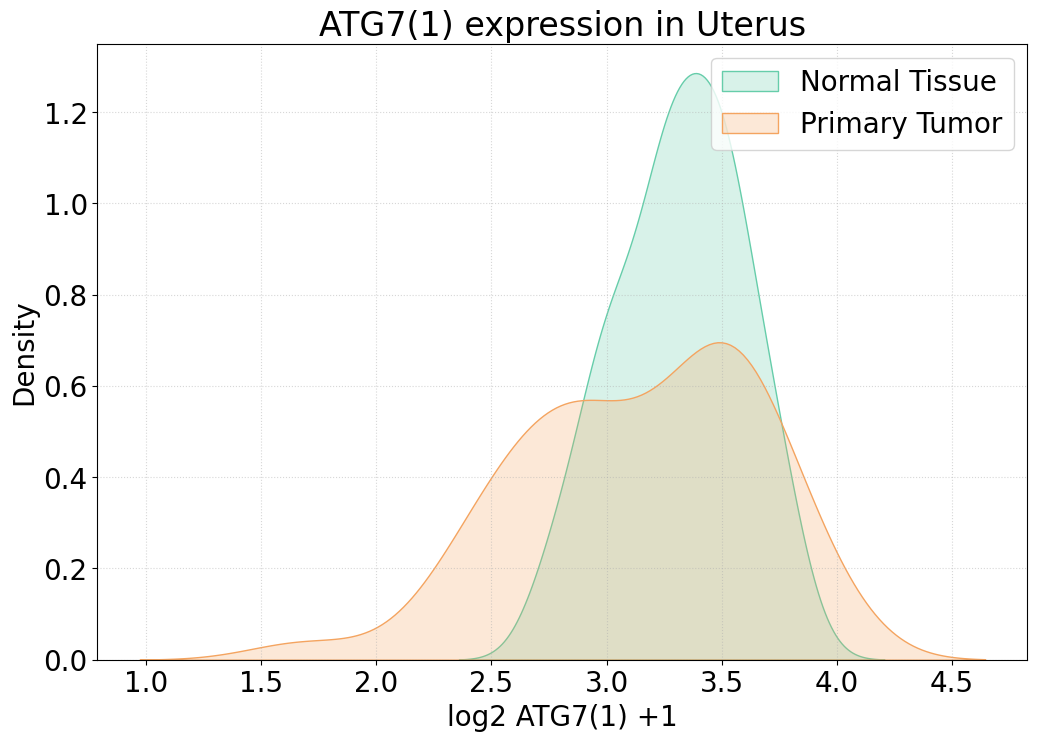

ATG7_2


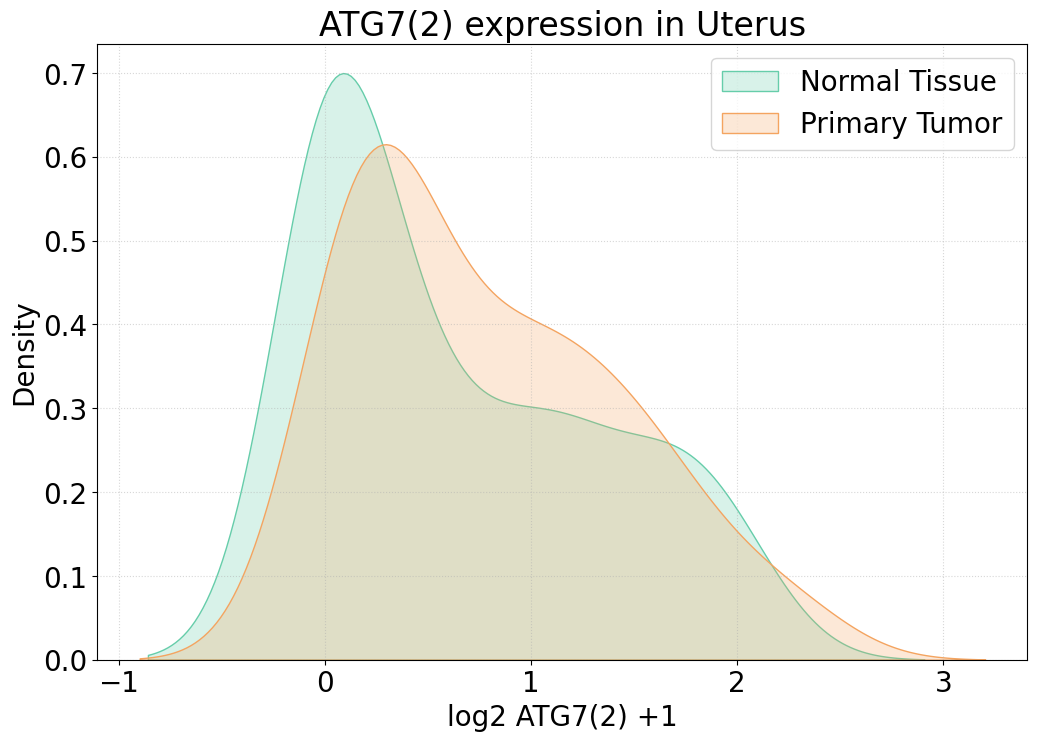

ATG7


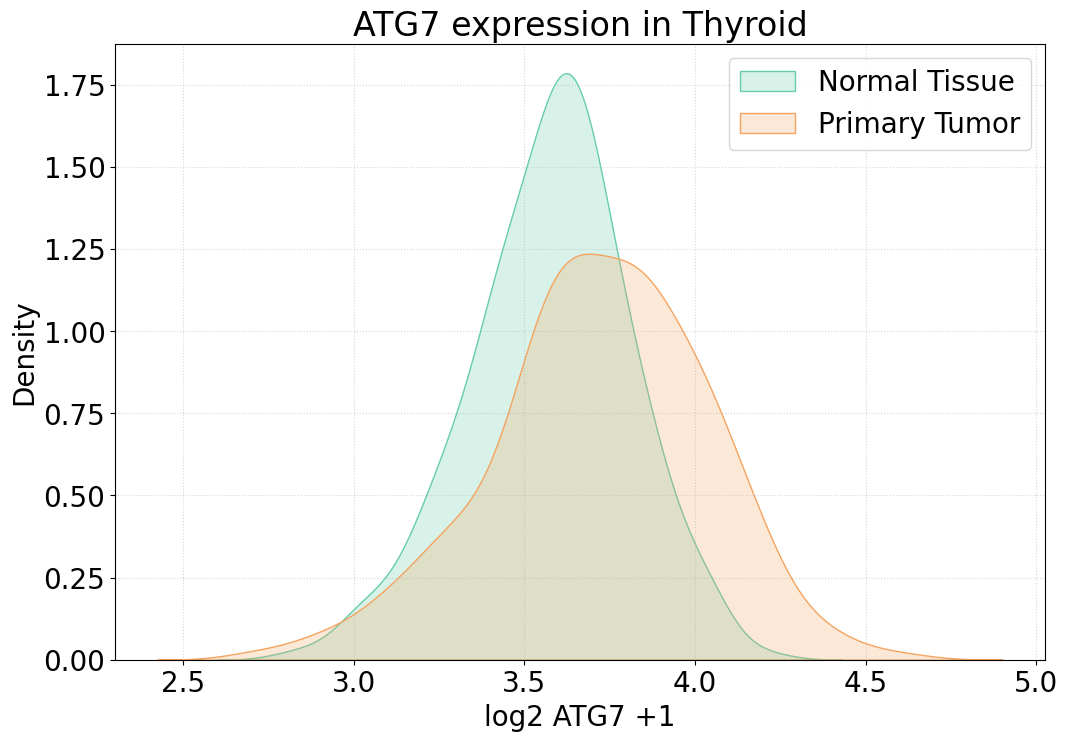

ATG7_1


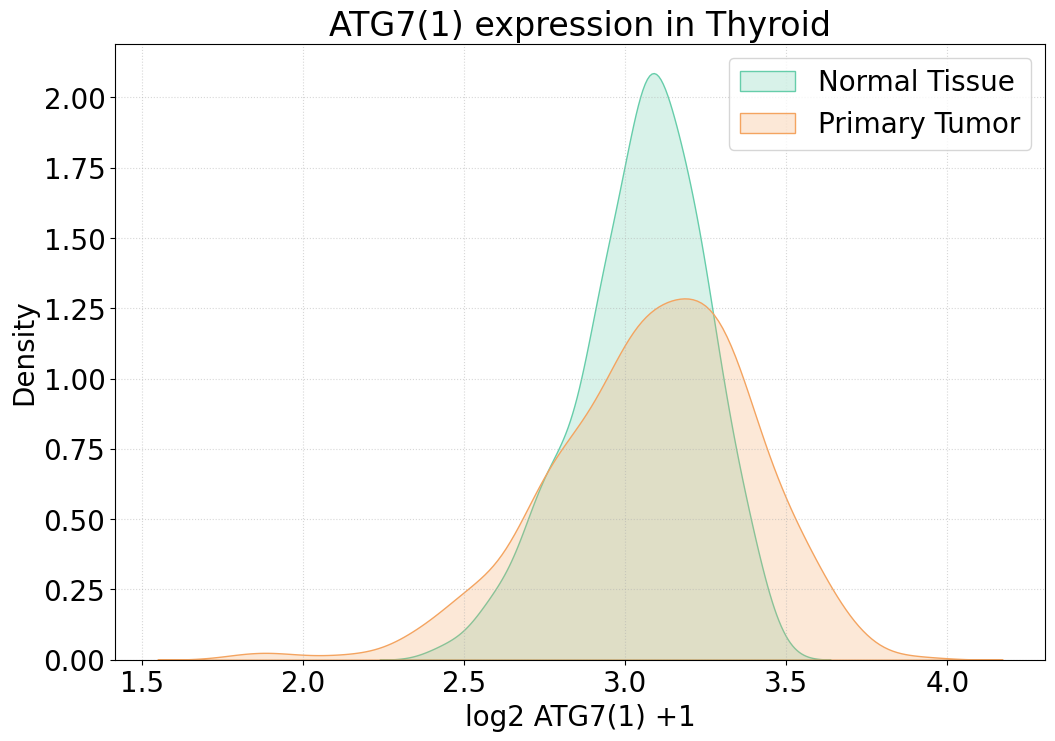

ATG7_2


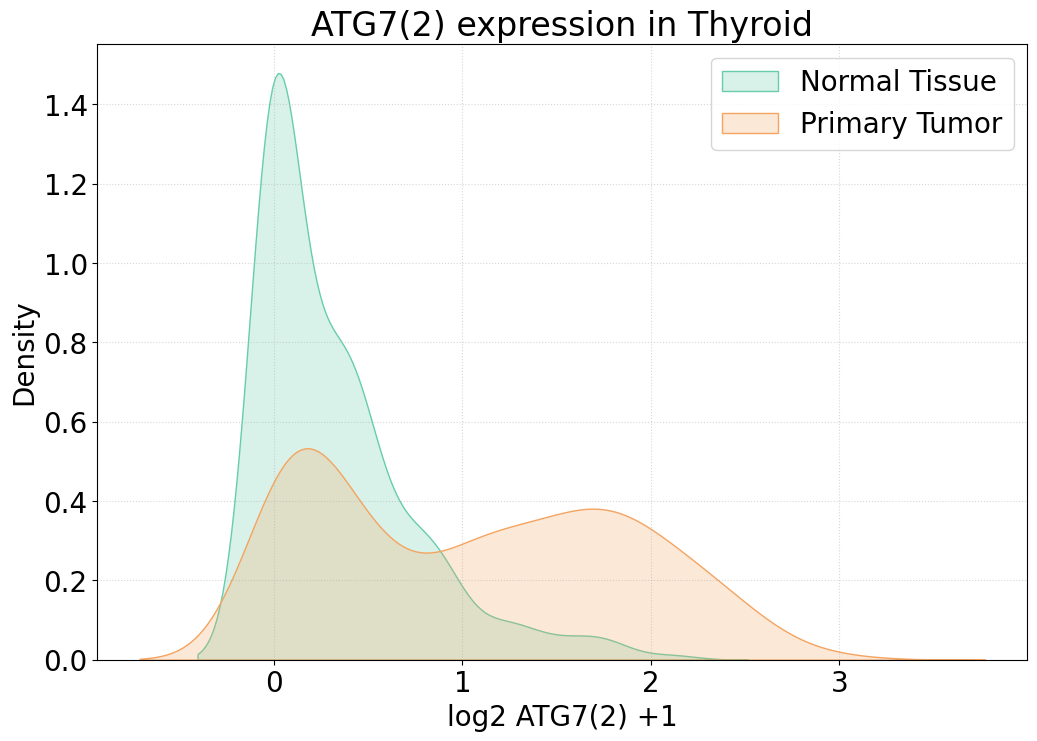

ATG7


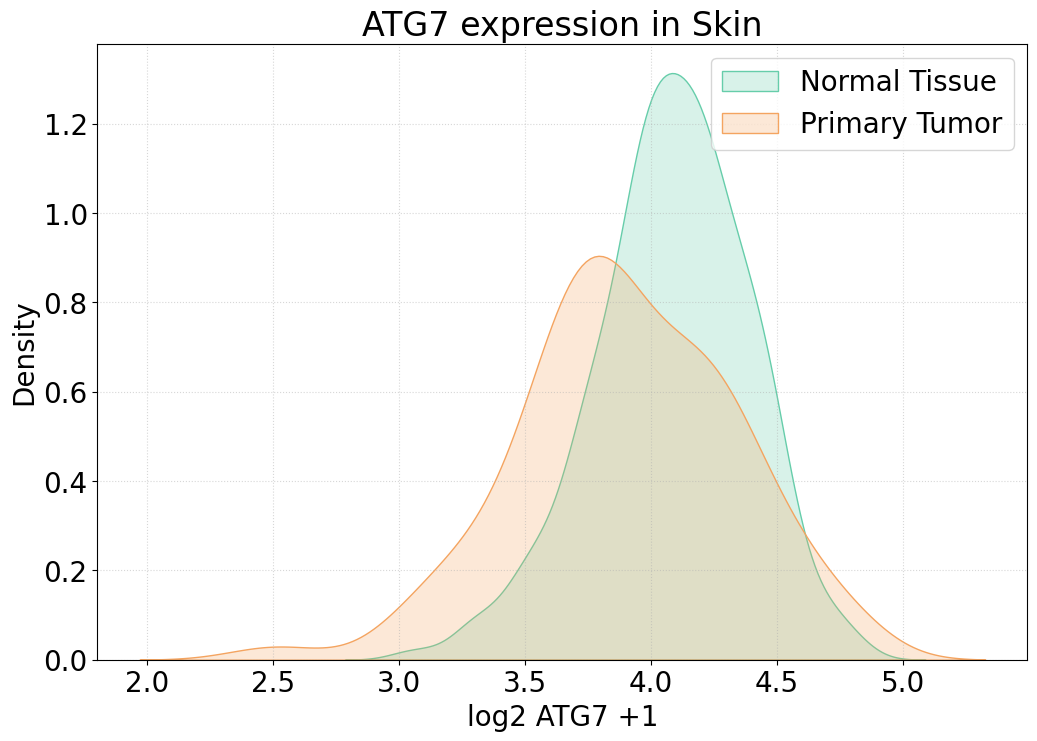

ATG7_1


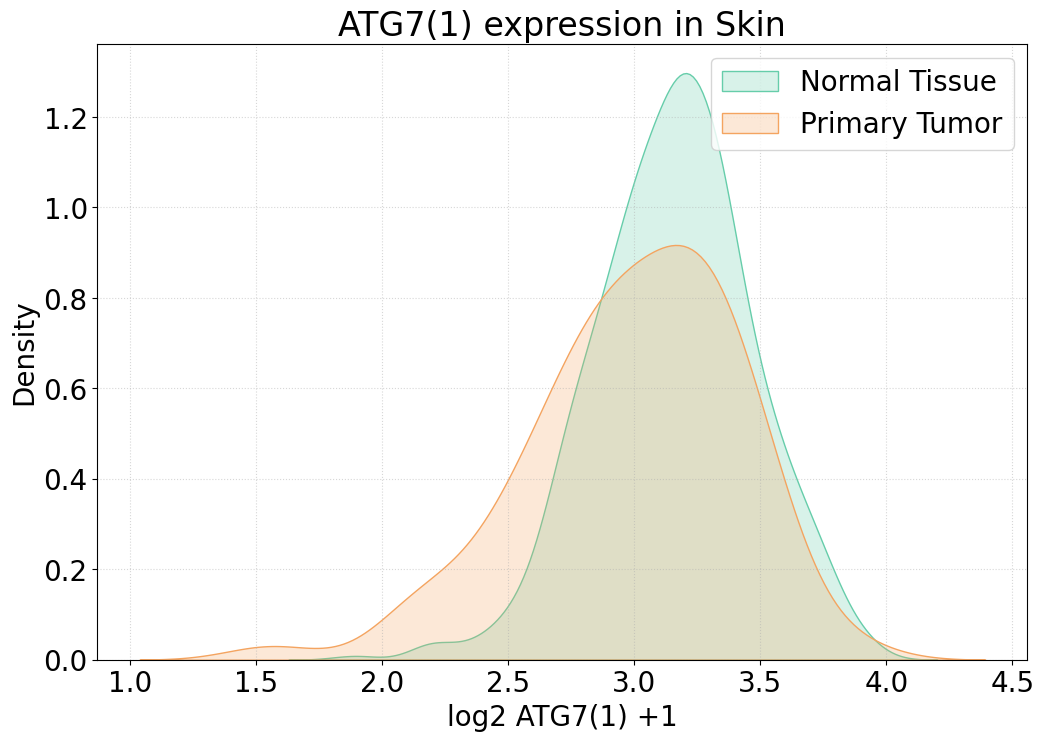

ATG7_2


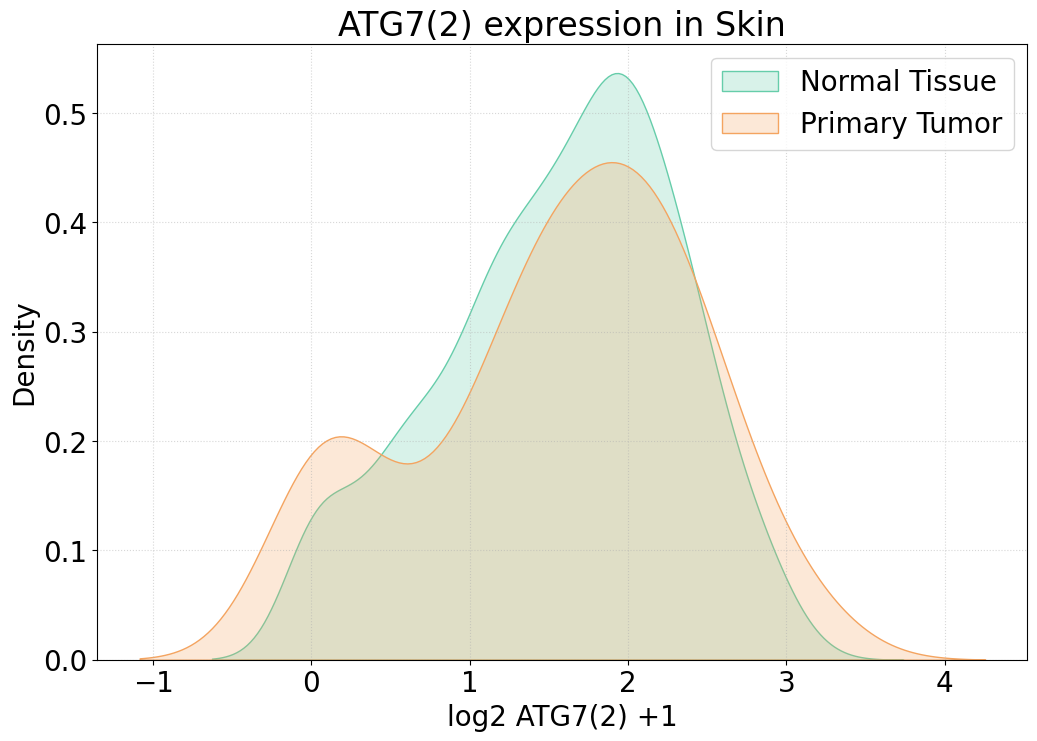

ATG7


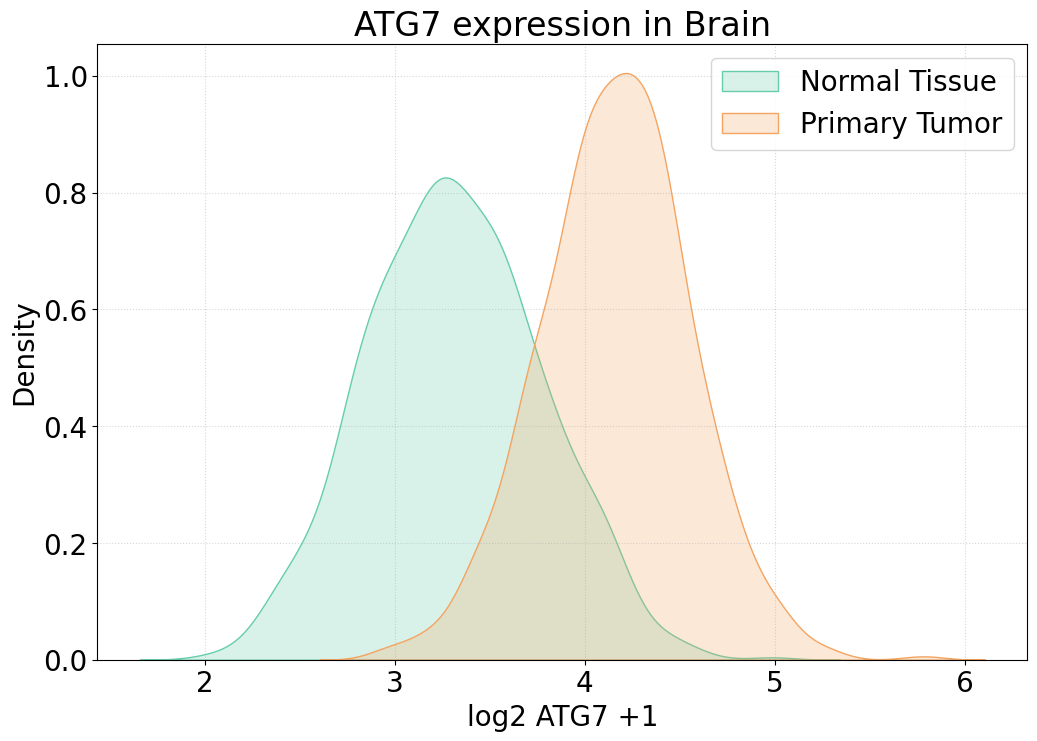

ATG7_1


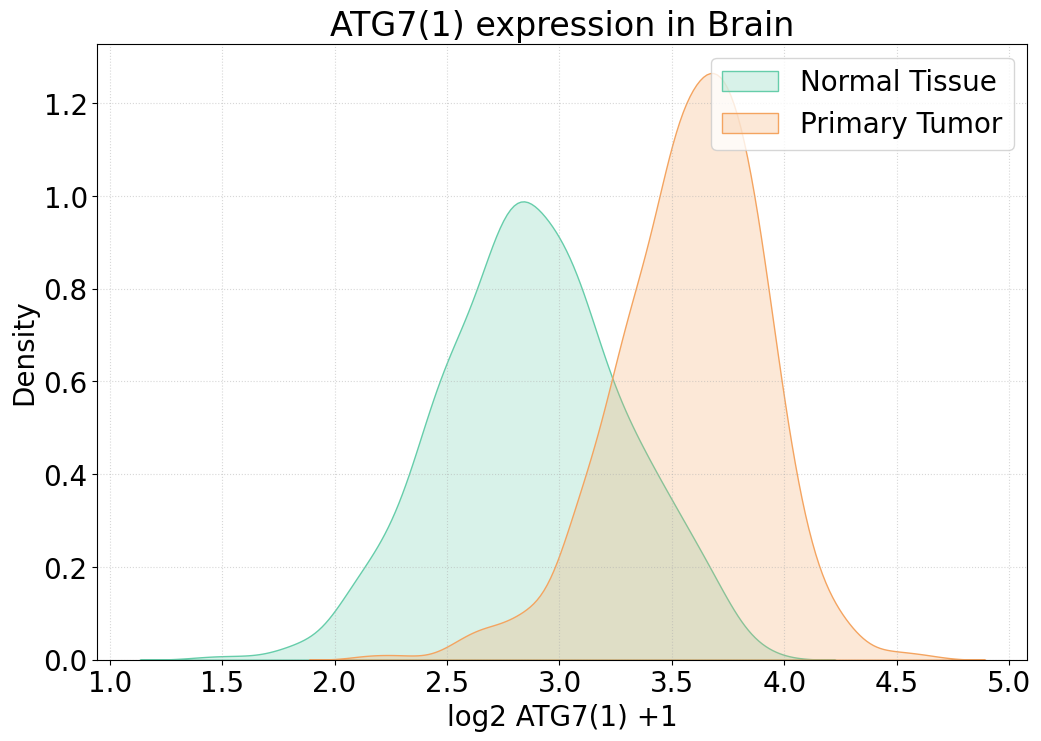

ATG7_2


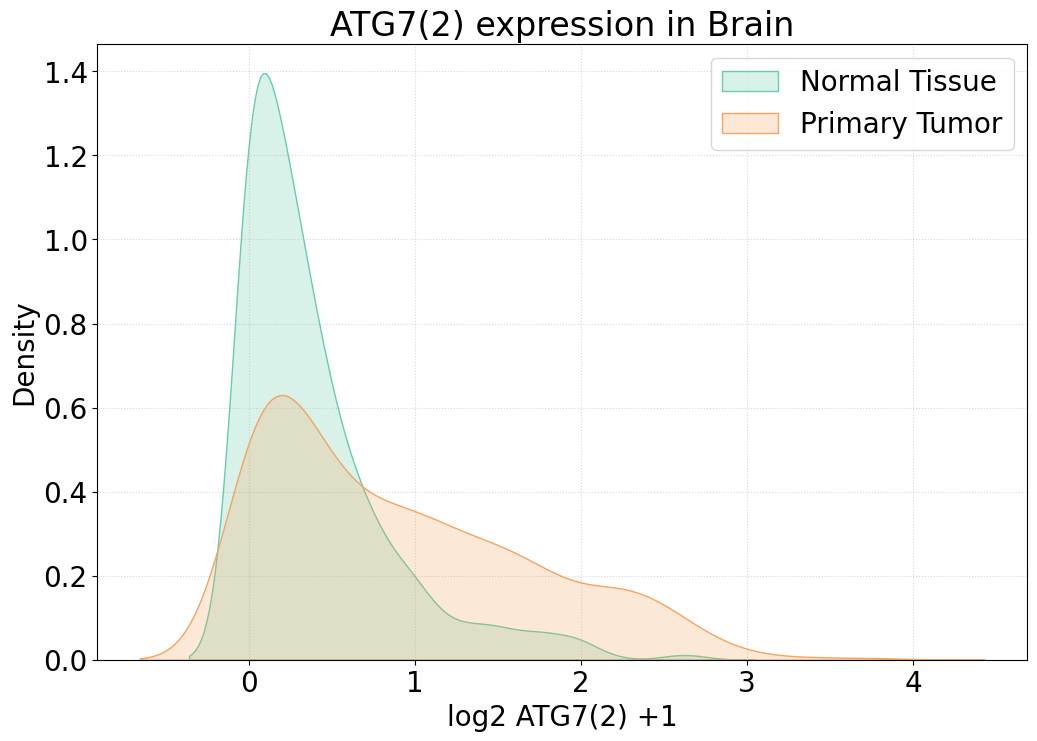

ATG7


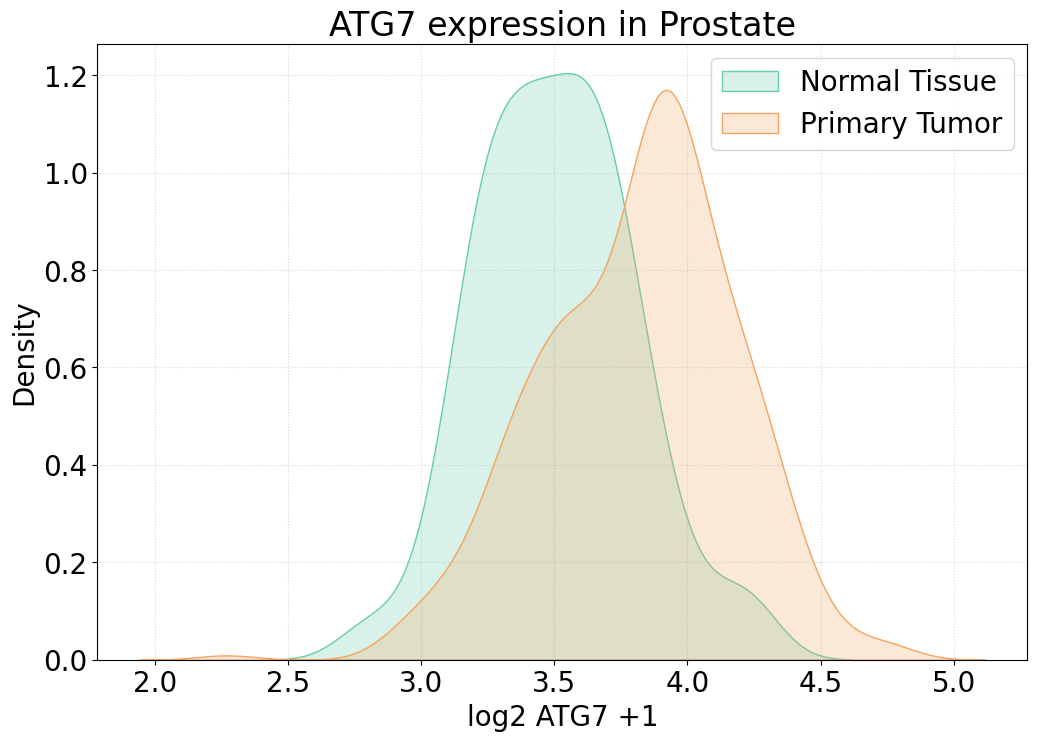

ATG7_1


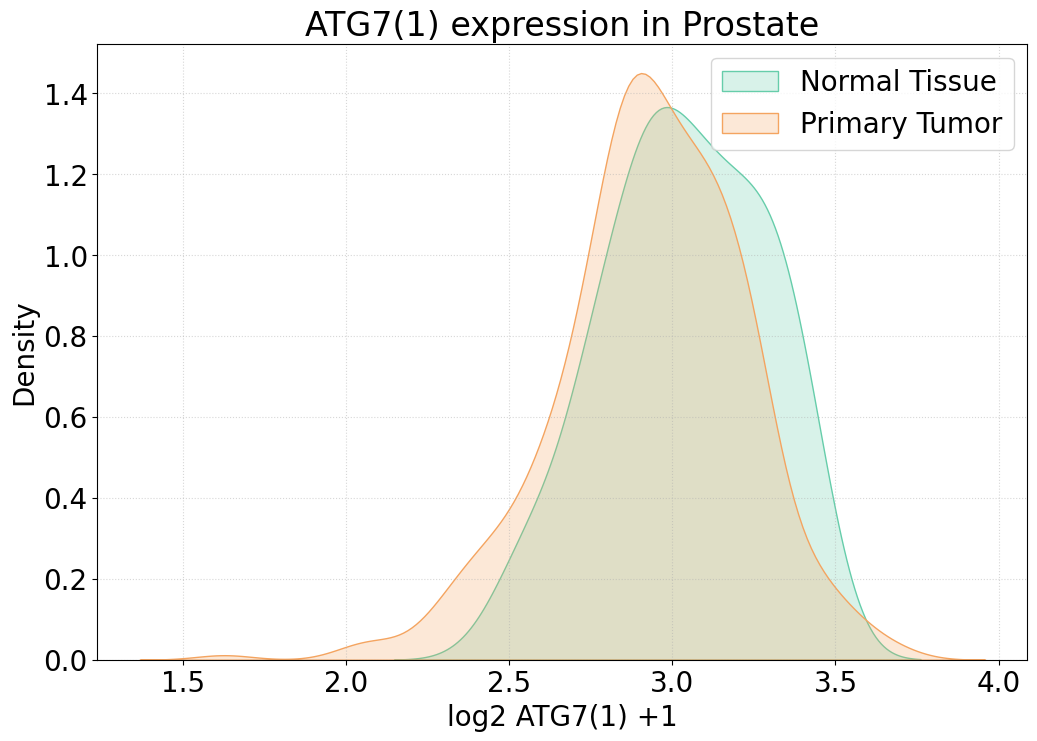

ATG7_2


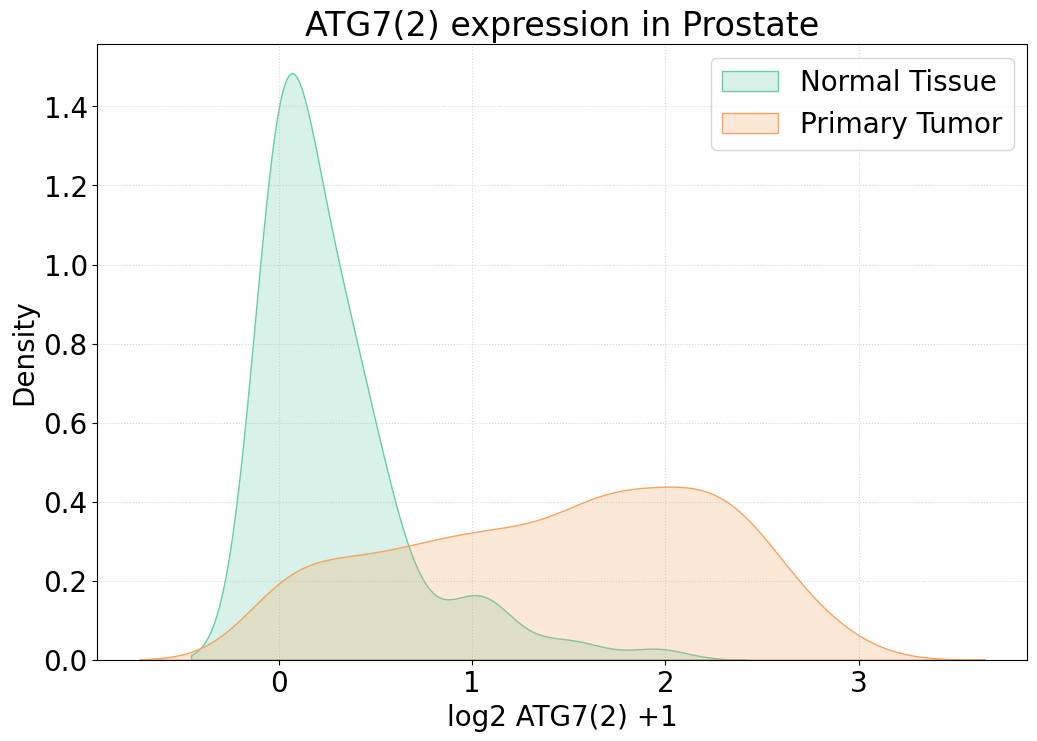

ATG7


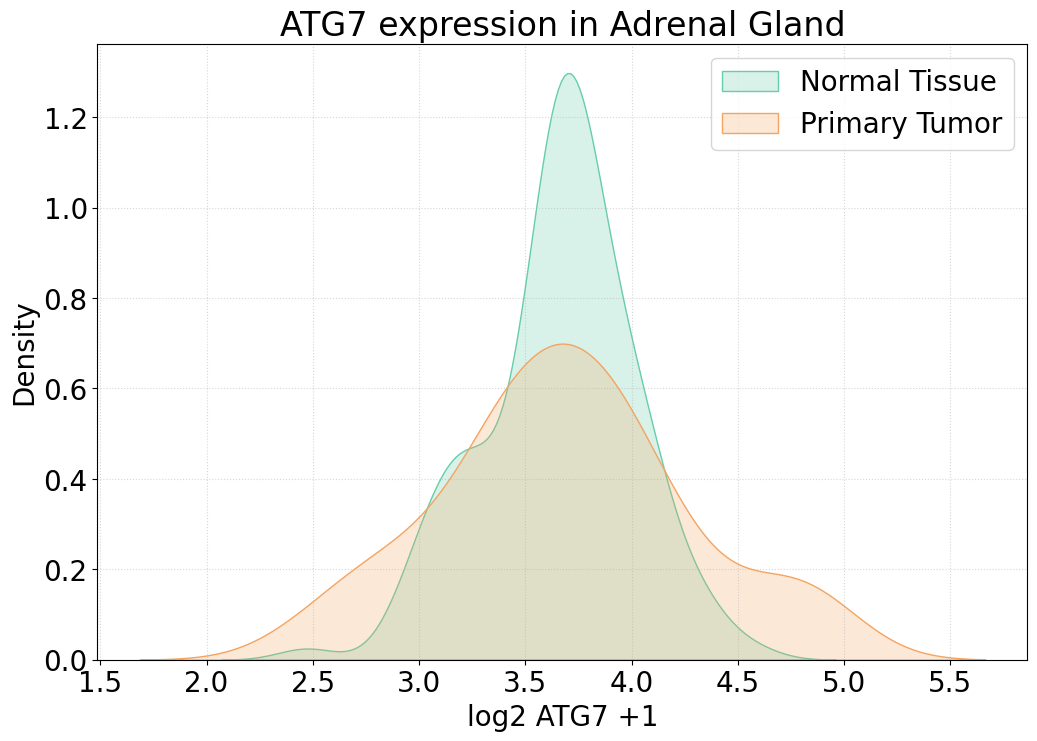

ATG7_1


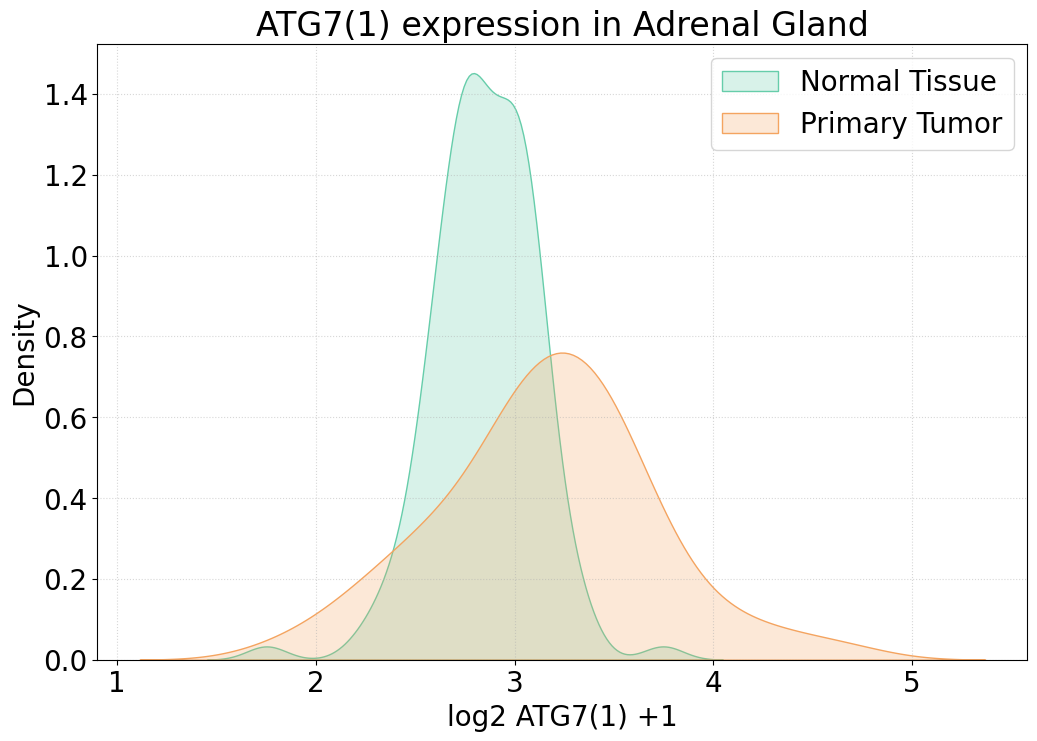

ATG7_2


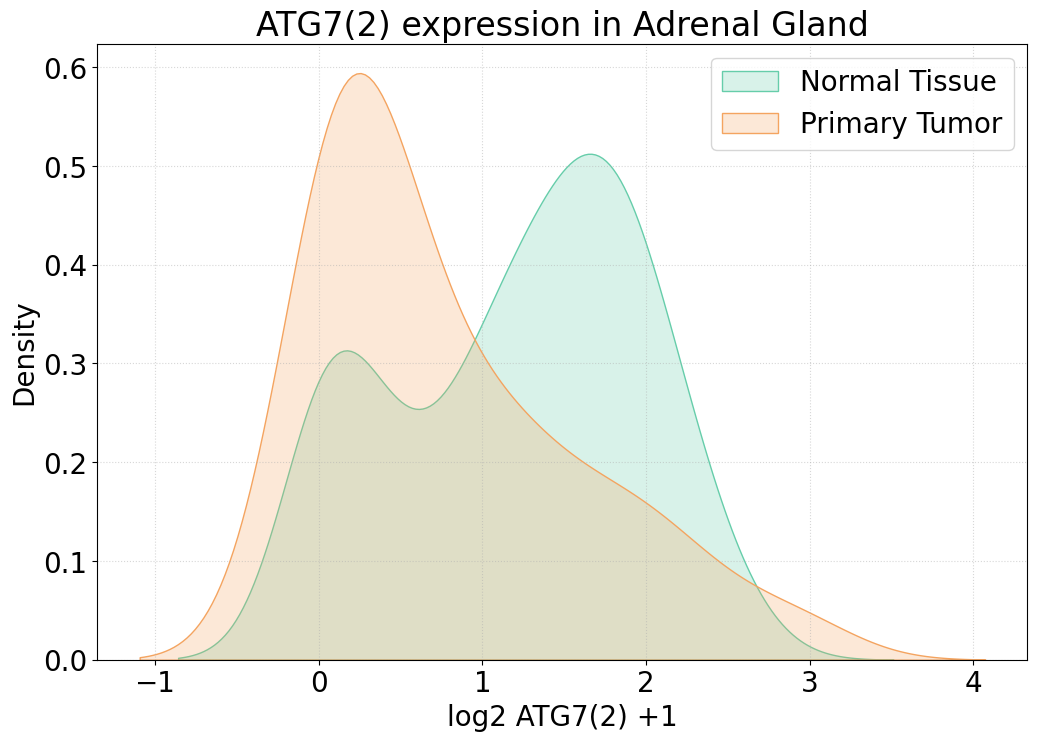

ATG7


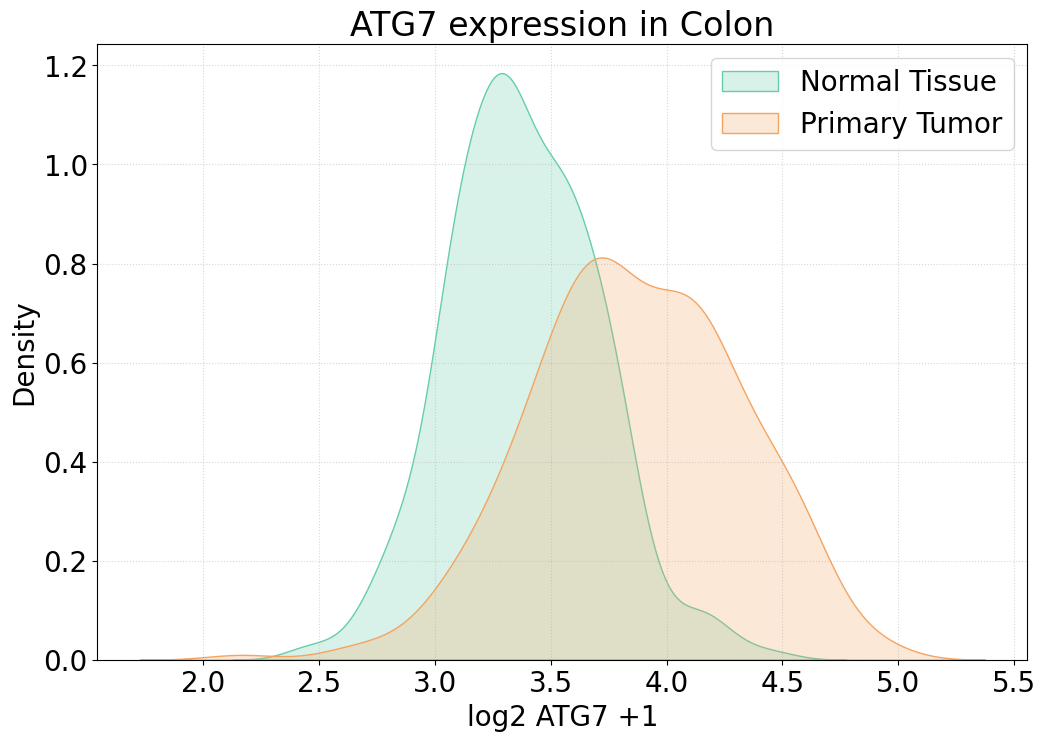

ATG7_1


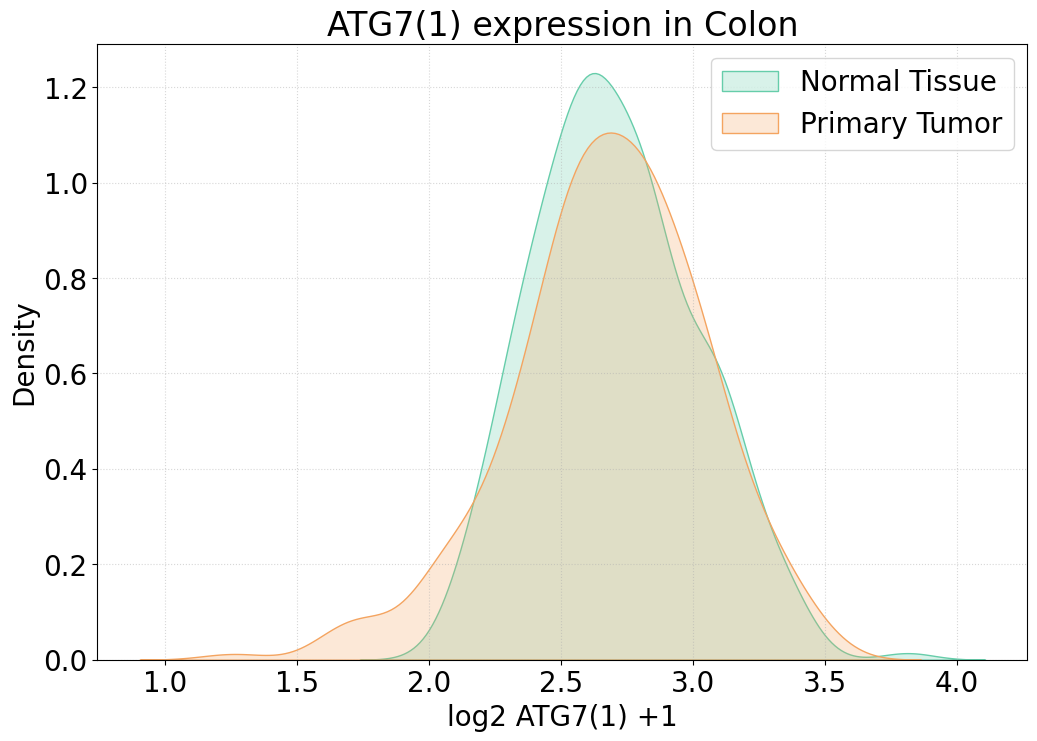

ATG7_2


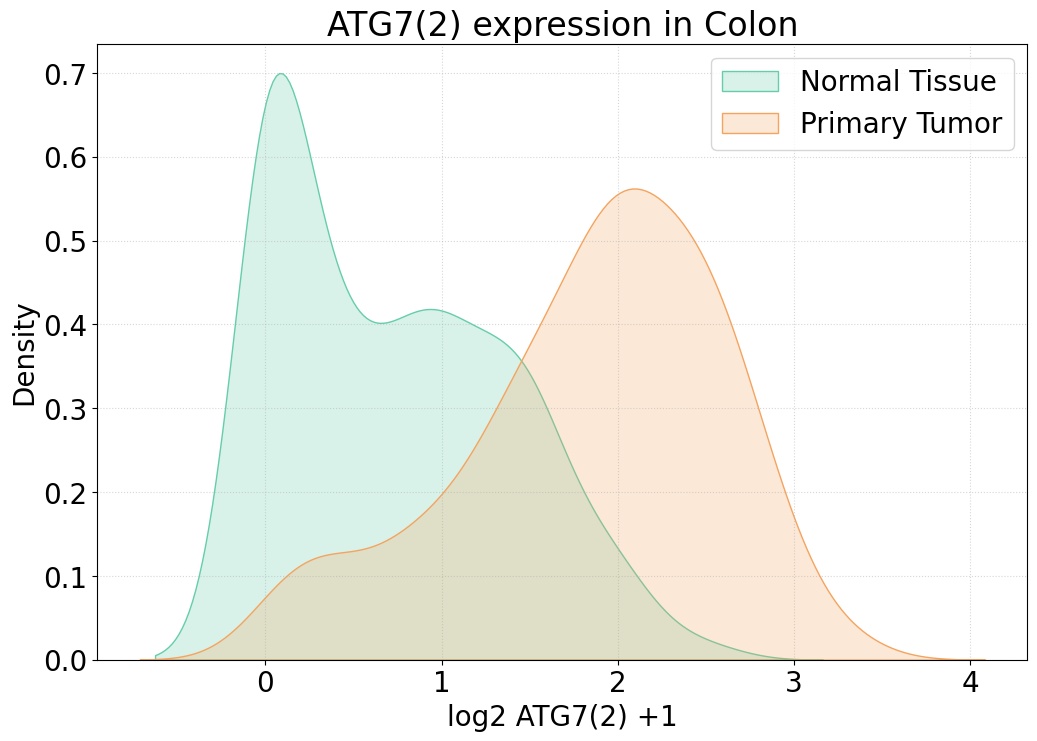

ATG7


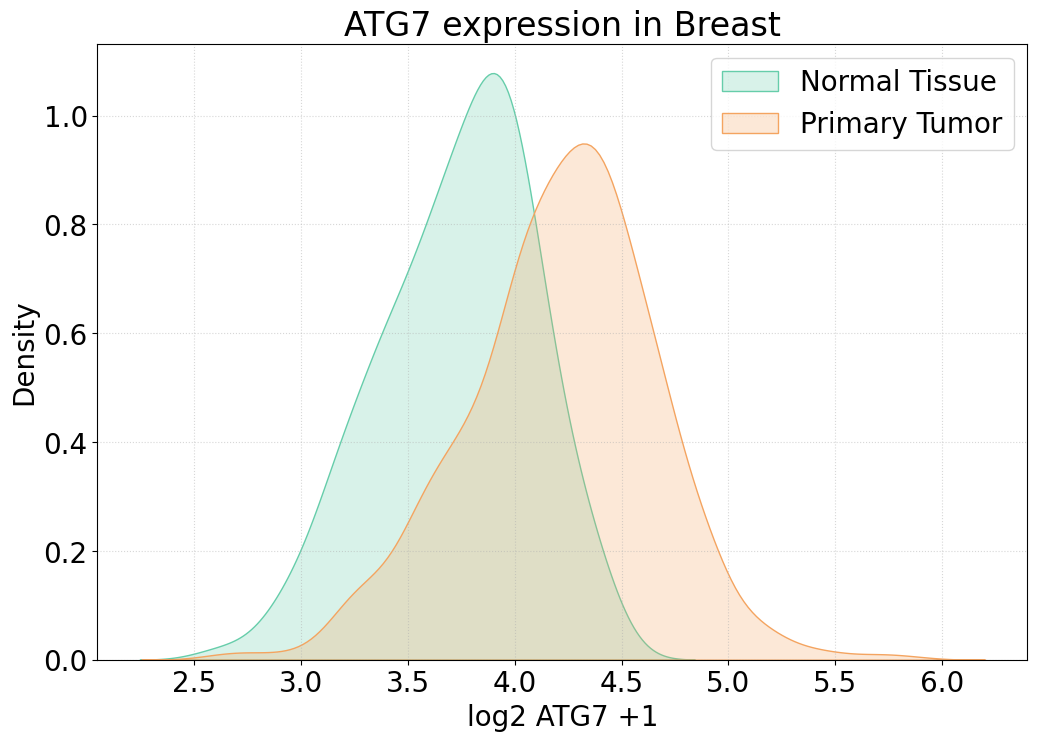

ATG7_1


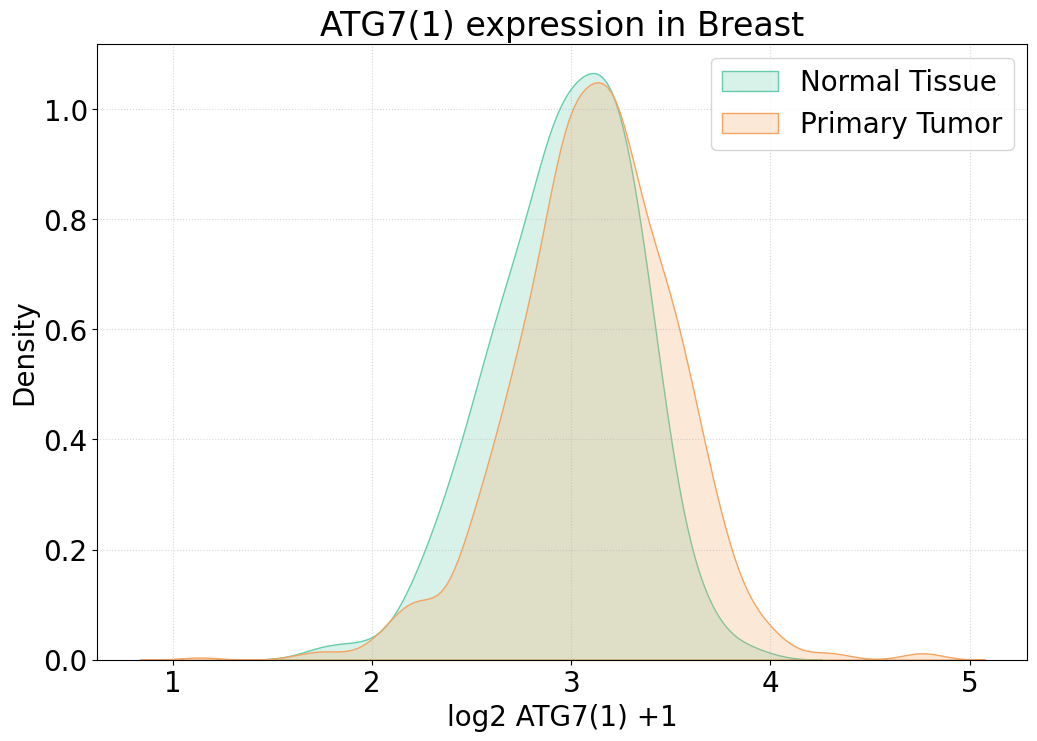

ATG7_2


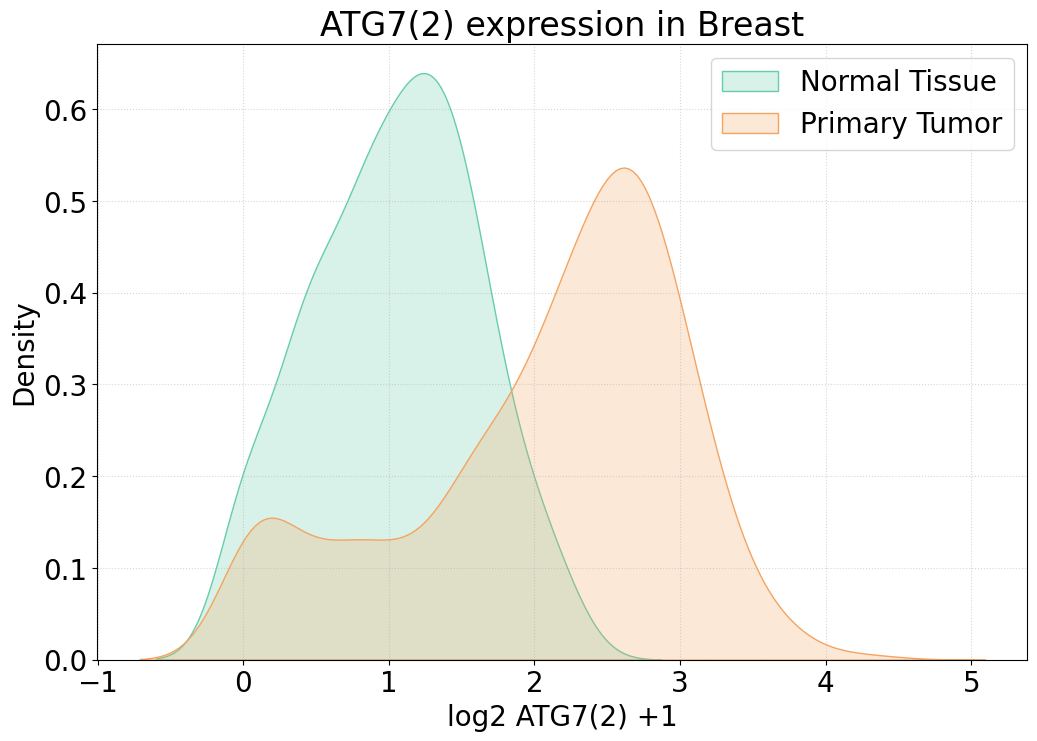

ATG7


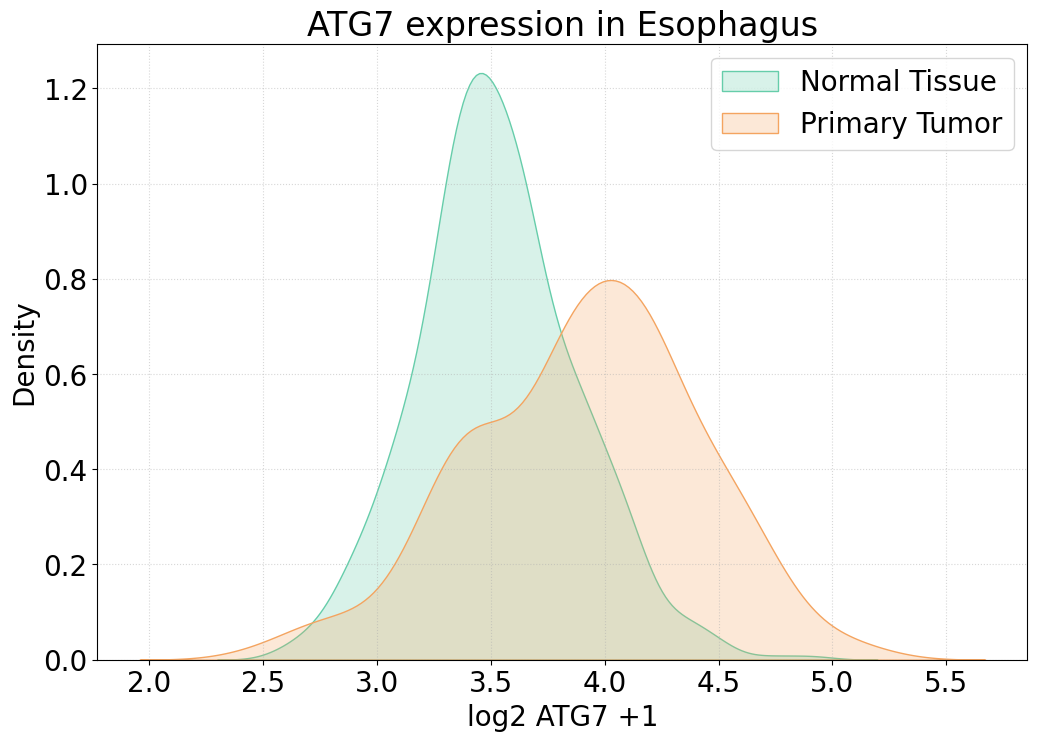

ATG7_1


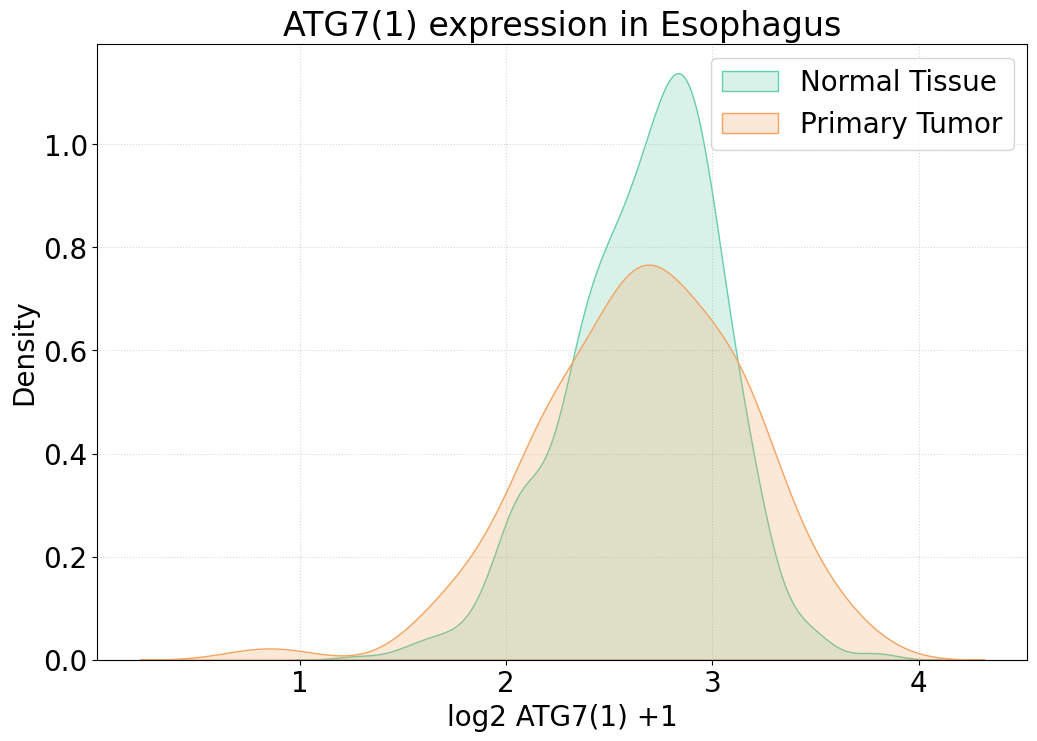

ATG7_2


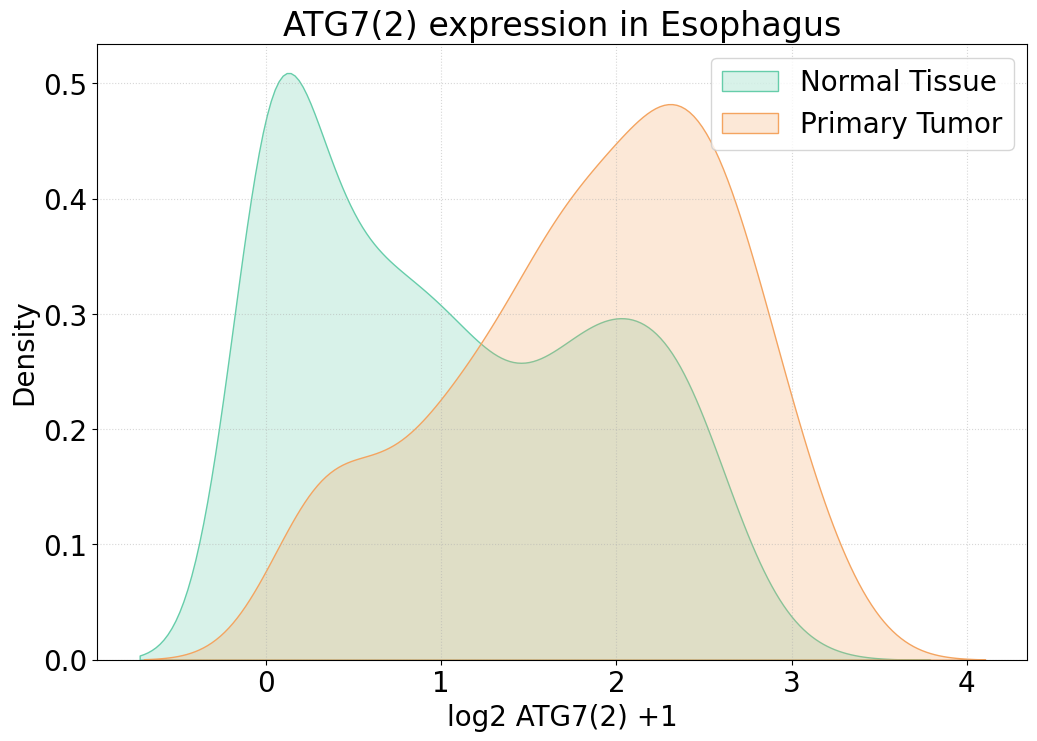

ATG7


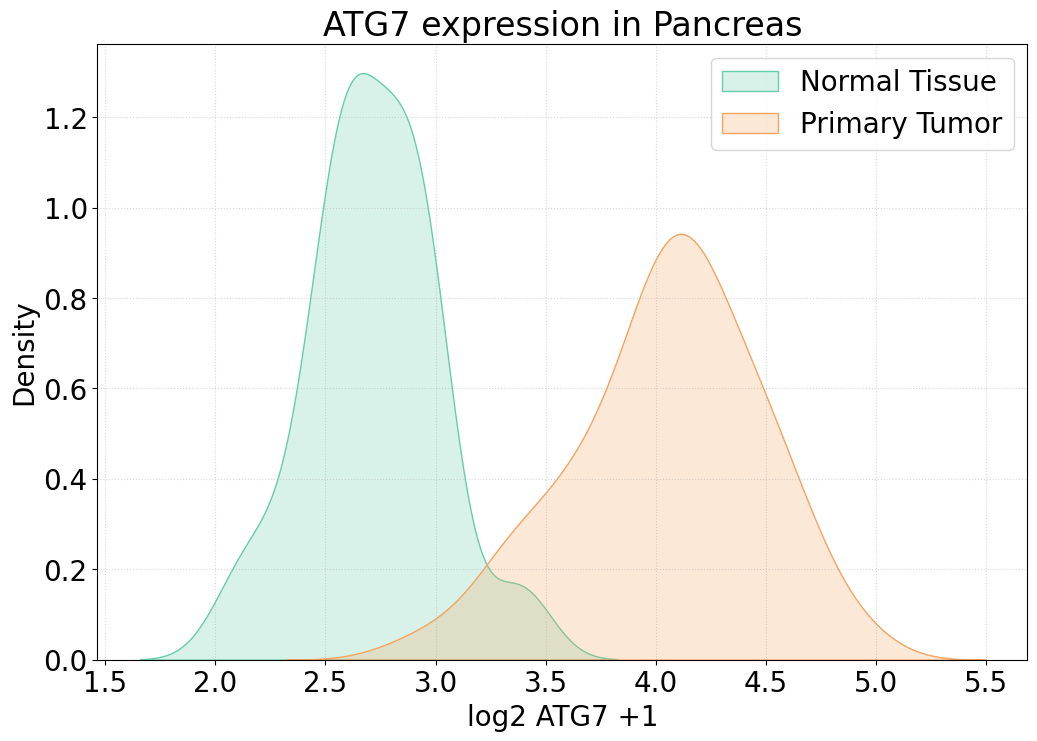

ATG7_1


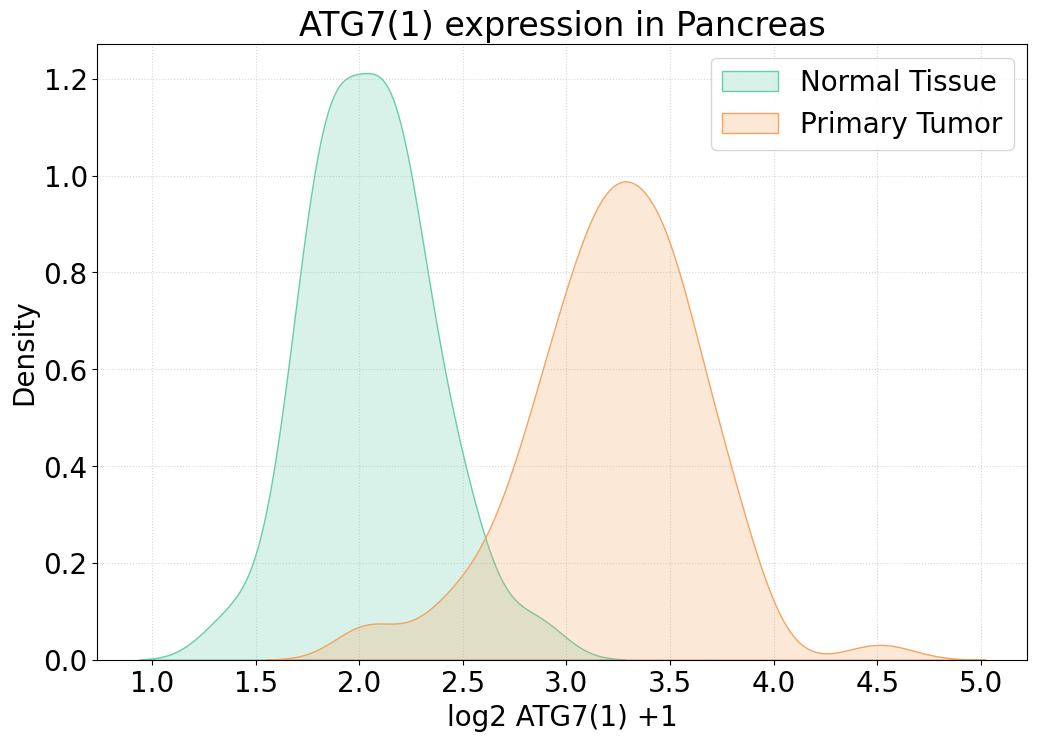

ATG7_2


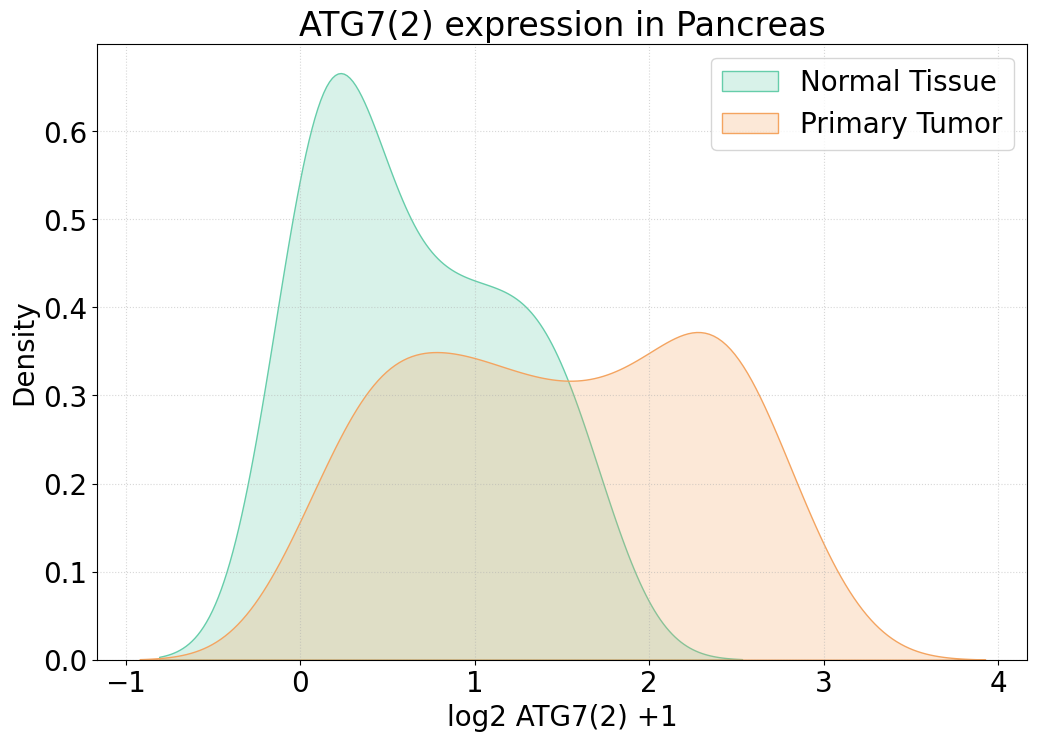

ATG7


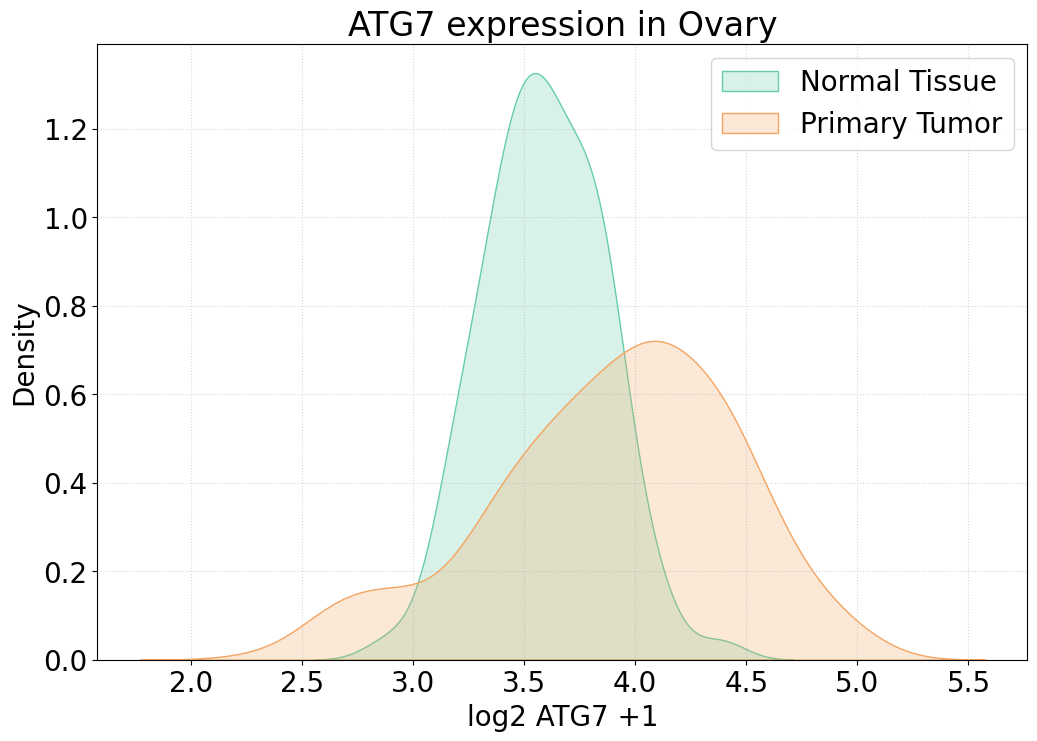

ATG7_1


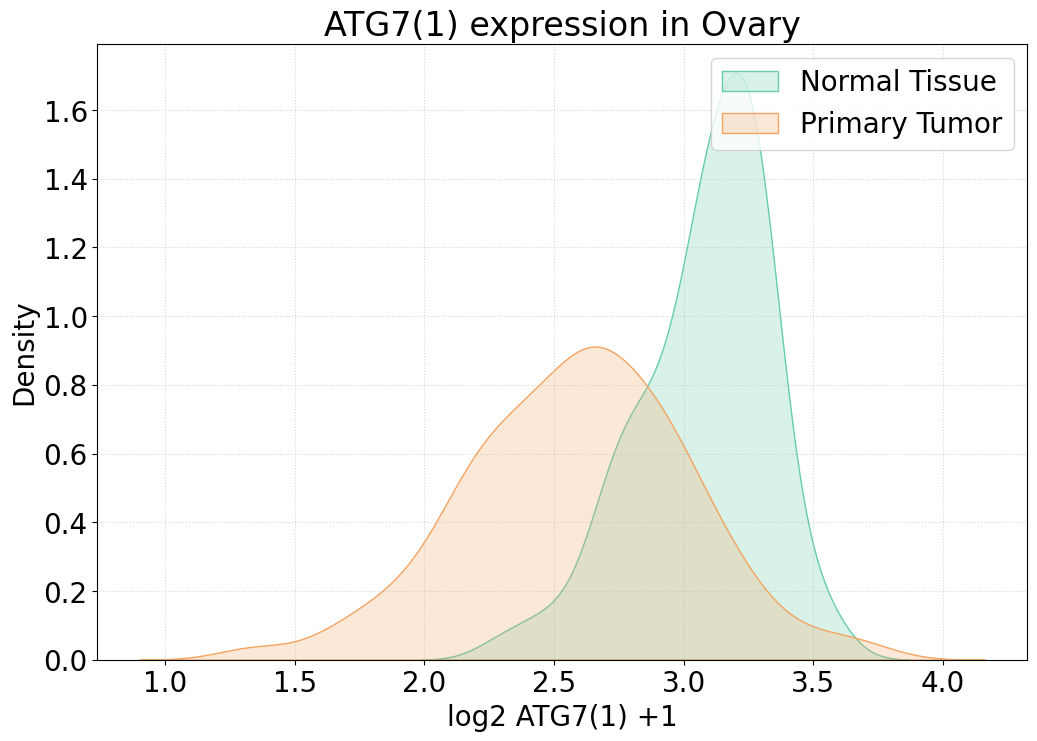

ATG7_2


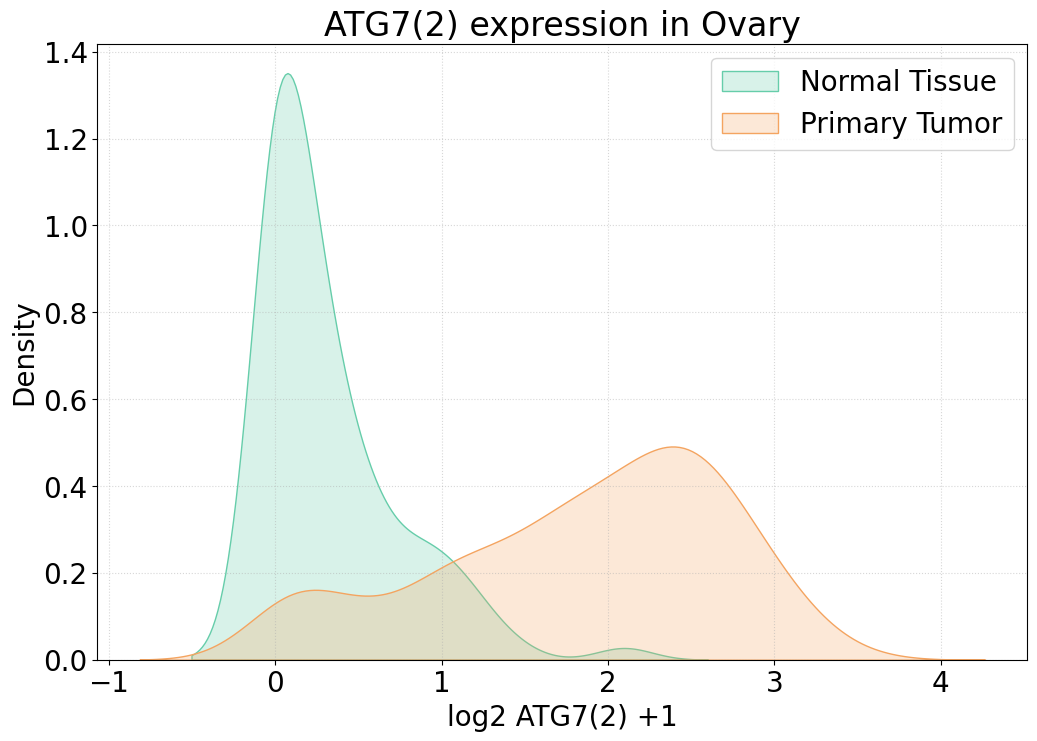

<Figure size 1200x800 with 0 Axes>

In [51]:
# Distribution graph, for ATG7, iso1 & iso2
isoforms = 'ATG7', 'ATG7_1', 'ATG7_2'
isoforms_info = 'ATG7', 'ATG7(1)', 'ATG7(2)'

tissues = set( list(df_ATG7_Normal["Primary_Site"]) )
for tissue in tissues:  
    df1 = df_ATG7_Normal[df_ATG7_Normal['Primary_Site'] == tissue]
    df2 = df_ATG7_Primary[df_ATG7_Primary['Primary_Site'] == tissue]
    
    for i in range(len(isoforms)):
        isoform = isoforms[i]
        print(isoform)
        isoform_info = isoforms_info[i]

        xData = df1[isoform]
        x2Data = df2[isoform]

        seaborn.kdeplot(xData, color = 'mediumaquamarine', fill = True)
        seaborn.kdeplot(x2Data, color = 'sandybrown', fill = True)

        plt.xlabel('log2 '+ isoform_info + ' +1')
        plt.title(isoform_info+ ' expression '+ 'in '+tissue)
        plt.legend(labels=["Normal Tissue","Primary Tumor"])
        
        title_file = 'distrib_' + isoform_info + '_' + tissue
        plt.savefig(path+path2+'distribution/'+title_file+'.pdf')
        
        plt.show()
        plt.clf()

## D) Fold Change (normal / primary) for each tissue

In [17]:
# Calculate fold change. 
tissues = set( list(df_ATG7_Normal["Primary_Site"]) )
tissue_l = []

isoforms = 'ATG7_1', 'ATG7_2'

#open pvalue lists
p_value1_l = []
p_value2_l = []
pvalue_lists = p_value1_l, p_value2_l

#open foldchange lists
foldchange_1_l = []
foldchange_2_l = []
fc_lists = foldchange_1_l, foldchange_2_l

for tissue in tissues:
    tissue_l.append(tissue)
    
    df1 = df_ATG7_Normal[df_ATG7_Normal['Primary_Site'] == tissue]
    df2 = df_ATG7_Primary[df_ATG7_Primary['Primary_Site'] == tissue]
    
    for i in range(len(isoforms)):
        isoform = isoforms[i]
        pvalue_l = pvalue_lists[i]
        foldchange_l = fc_lists[i]
        
        #calculate FoldChange (primary / normal)
        fc = df2[isoform].median() - df1[isoform].median()
        foldchange_l.append(fc)
        # Mann-Whitney analysis ATG7(1)
        statistic, pvalue = scipy.stats.mannwhitneyu(df1[isoform], df2[isoform])
        pvalue_l.append(pvalue)
        
print(p_value1_l[:5], '\n', foldchange_1_l[:5], '\n',p_value2_l[:5], '\n',foldchange_2_l[:5])

[2.2167151978091146e-19, 8.403699487939309e-06, 0.002443737900167711, 0.001529704870141351, 0.8225908094973025] 
 [1.1732940080548007, 0.3415104122029473, -0.1632658817458541, -0.11191961584330201, 0.02532746557453658] 
 [1.417667687283727e-07, 0.0008282279924730188, 0.9170270472250912, 2.3752715334249805e-33, 1.1203183610863914e-52] 
 [0.9133172201777546, -0.7900675317315434, 0.04906584000732184, 1.389852296985101, 1.3662472939486532]


In [18]:
# Bonferroni correction on the number of tests. 30 (15 tissues x2)
p_values_nonAdj = p_value1_l + p_value2_l
sign_answer, adj_pvalue, c , d  = multipletests(p_values_nonAdj, alpha = 0.05, method='bonferroni')
   
#save in dict, then to df
d = dict(tissue = tissue_l, 
         FC_ATG7_1 = foldchange_1_l, p_value_iso1 = p_value1_l, adj_pvalue_iso1 = adj_pvalue[0:15],
         FC_ATG7_2 = foldchange_2_l, p_value_iso2 = p_value2_l, adj_pvalue_iso2 = adj_pvalue[15:])

df_ATG7_diff_tissues = pandas.DataFrame.from_dict(d, orient='columns')

#create column for absolute difference order
df_ATG7_diff_tissues = df_ATG7_diff_tissues.assign(abs_diff = (abs(df_ATG7_diff_tissues['FC_ATG7_2'])) - abs(df_ATG7_diff_tissues['FC_ATG7_1']))
df_ATG7_diff_tissues = df_ATG7_diff_tissues.sort_values('abs_diff', ascending=False)

# and reset_index
df_ATG7_diff_tissues.set_index('tissue',inplace = True, drop = True)

df_ATG7_diff_tissues

FC_ATG7_1   p_value_iso1  adj_pvalue_iso1  FC_ATG7_2  \
tissue                                                                
Colon           0.025327   8.225908e-01     1.000000e+00   1.366247   
Ovary          -0.518178   7.404704e-23     2.221411e-21   1.830811   
Prostate       -0.111920   1.529705e-03     4.589115e-02   1.389852   
Breast          0.148718   4.611850e-06     1.383555e-04   1.224028   
Esophagus      -0.028778   9.035713e-01     1.000000e+00   1.042235   
Thyroid         0.045468   1.108763e-02     3.326288e-01   0.864064   
Stomach         0.182214   8.439681e-05     2.531904e-03   0.991857   
Adrenal Gland   0.341510   8.403699e-06     2.521110e-04  -0.790068   
Liver           0.666975   7.233840e-08     2.170152e-06   1.113490   
Lung           -0.480112   1.732279e-55     5.196838e-54   0.694777   
Uterus         -0.161161   1.069583e-01     1.000000e+00   0.235702   
Skin           -0.163266   2.443738e-03     7.331214e-02   0.049066   
Testis         -0.432315   9.209767e-18     2.762930e-16   0.247363   
Pancreas        1.173294   2.216715e-19     6.650146e-18   0.913317   
Brain           0.740794  3.175075e-159    9.525225e-158   0.471436   

               p_value_iso2  adj_pvalue_iso2  abs_diff  
tissue                                                  
Colon          1.120318e-52     3.360955e-51  1.340920  
Ovary          6.212586e-34     1.863776e-32  1.312634  
Prostate       2.375272e-33     7.125815e-32  1.277933  
Breast         6.803183e-42     2.040955e-40  1.075310  
Esophagus      4.799372e-24     1.439812e-22  1.013457  
Thyroid        2.383954e-36     7.151862e-35  0.818596  
Stomach        2.433616e-23     7.300847e-22  0.809643  
Adrenal Gland  8.282280e-04     2.484684e-02  0.448557  
Liver          6.030569e-07     1.809171e-05  0.446515  
Lung           6.359959e-29     1.907988e-27  0.214666  
Uterus         6.507271e-02     1.000000e+00  0.074541  
Skin           9.170270e-01     1.000000e+00 -0.114200  
Testis         1.765895e-01     1.000000e+00 -0.184952  
Pancreas       1.417668e-07     4.253003e-06 -0.259977  
Brain          4.935234e-37     1.480570e-35 -0.269358

0.0024626042007544523


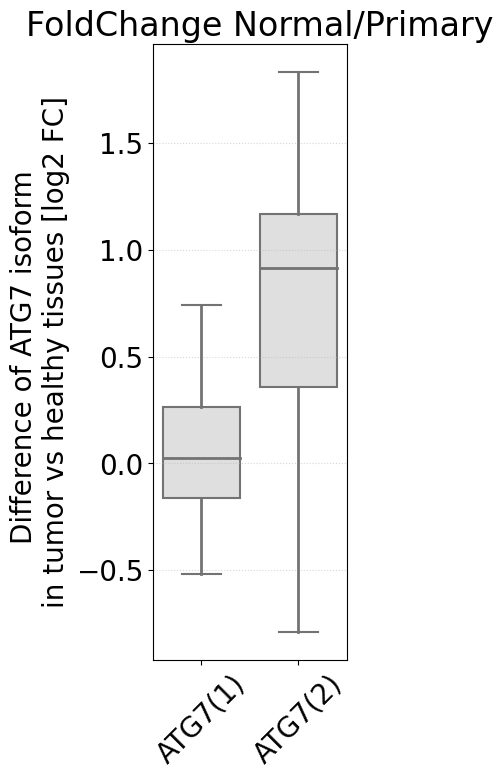

In [19]:
 #Graph, Bloxplot FC
df = df_ATG7_diff_tissues[['FC_ATG7_1','FC_ATG7_2']]

df = df.rename(columns = {'FC_ATG7_1' : 'ATG7(1)',
                          'FC_ATG7_2' : 'ATG7(2)'})


statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(1)'], df['ATG7(2)'])
print(pvalue)


plt.figure(figsize=(2.5, 8))
ax = seaborn.boxplot(data = df, color = 'silver', 
                     medianprops={'lw':2}, whiskerprops={'lw':2},
                     showcaps=True, showfliers=False)

# seaborn.stripplot(data = df, color = 'black', alpha = 0.5)

# adding transparency to colors
for patch in ax.patches:
     r, g, b, a = patch.get_facecolor()
     patch.set_facecolor((r, g, b, .5))

plt.ylabel('Difference of ATG7 isoform \nin tumor vs healthy tissues [log2 FC]')
plt.xlabel('')
plt.xticks(rotation = 45)
text_title = 'FoldChange Normal/Primary'
plt.title(text_title, x=.55)

title_file = 'boxplot_FC_thesis'
plt.savefig(path+path2+title_file+'.svg')

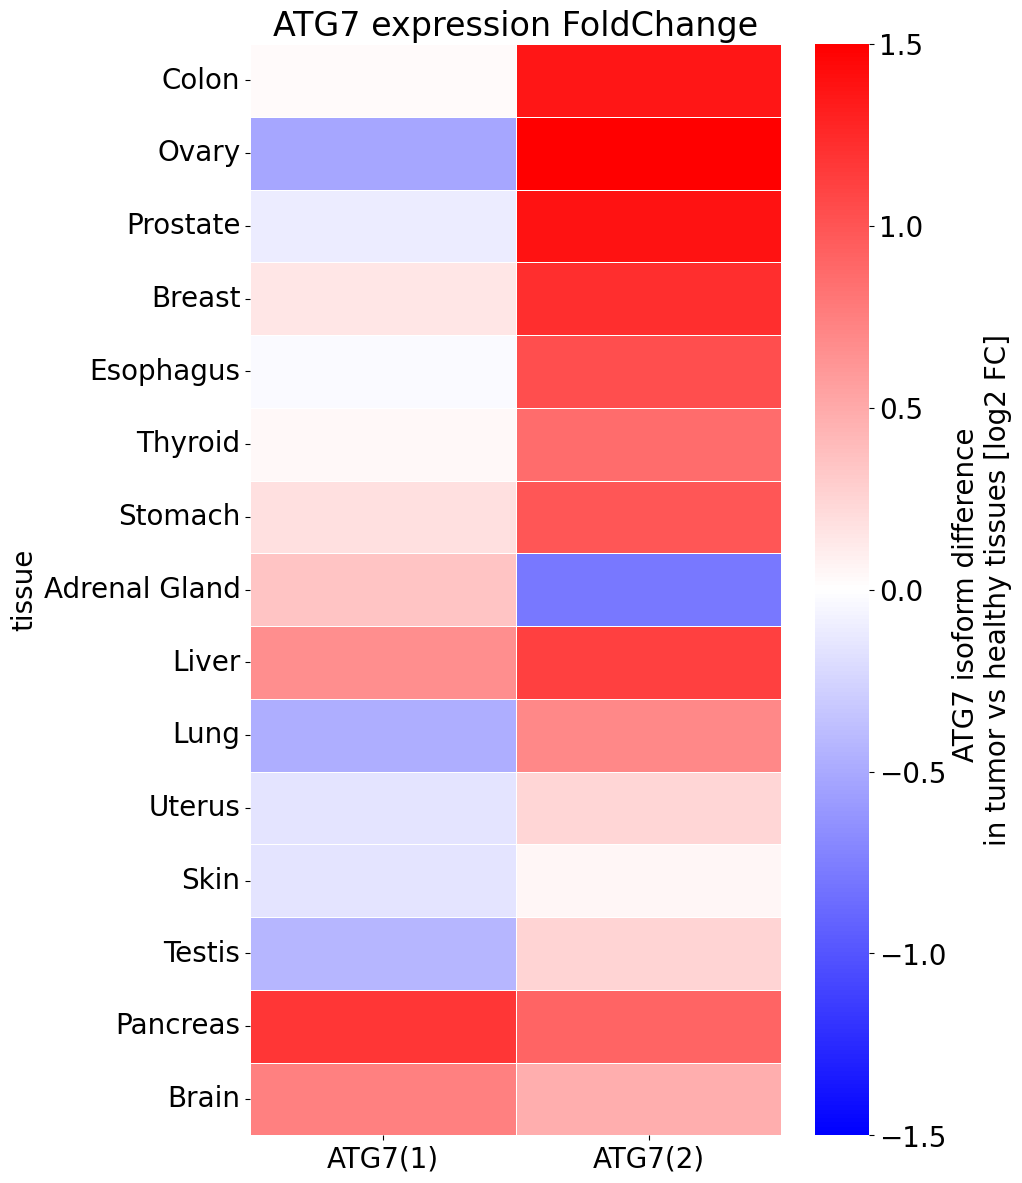

In [21]:
#Heatmap FC
df = df_ATG7_diff_tissues

HeatMap_df = df[['FC_ATG7_1', 'FC_ATG7_2']]
HeatMap_df = HeatMap_df.rename(columns = {'FC_ATG7_1' : 'ATG7(1)',
                                          'FC_ATG7_2' : 'ATG7(2)',})
HeatMap_df = HeatMap_df.astype(float)

plt.subplots(figsize=(8,12))
plt.tight_layout()
seaborn.heatmap(HeatMap_df, annot=False, cmap="bwr", linewidths=.5, center=0, vmin=-1.5, vmax=1.5,
               cbar_kws={'label': 'ATG7 isoform difference \nin tumor vs healthy tissues [log2 FC]'})
plt.title('ATG7 expression FoldChange')

title_file = 'Heatmap_FC_thesis'
plt.savefig(path+path2+title_file+'.svg')

## E) ATG7 isoform correlation in each tissue

In [26]:
#stats_ spearman correlation
#graph
color1 = '#72B6A1'
color2 = '#e99675'

tissue_l = []
r_value_l = []
p_value_l = []
sample_type_l = []

tissues = set( list(df_ATG7_Normal["Primary_Site"]) )
for tissue in tissues:  

#     print(tissue)
    df1 = df_ATG7_Normal[df_ATG7_Normal['Primary_Site'] == tissue]
    df2 = df_ATG7_Primary[df_ATG7_Primary['Primary_Site'] == tissue]
    
    dfs = df1, df2 
    infos = "Normal tissue", "Primary tumor"
    colors = color1, color2
    
    for i in range(len(dfs)): 
        df = dfs[i]
        info = infos[i]
        color = colors[i]

        x = df['ATG7_1tpm'].to_list()
        y = df['ATG7_2tpm'].to_list()    

        #stat Spearman correlation 
        r_value, p_value = scipy.stats.spearmanr(x, y)
       
        r_value_l.append(r_value)
        p_value_l.append(p_value)
        sample_type_l.append(info)
        tissue_l.append(tissue)
           
#save in dict, then to df
d = dict(tissue = tissue_l, sample_type = sample_type_l, Corr_score = r_value_l, P_value = p_value_l)

#Transpose to have a better table
df_atg7_correlation_tissues = pandas.DataFrame.from_dict(d, orient='index')
df_atg7_correlation_tissues = df_atg7_correlation_tissues.transpose()

#keep minimum text in sample_type for later
df_atg7_correlation_tissues['sample_type'] = df_atg7_correlation_tissues['sample_type'].apply(lambda x: x.split(' ')[0])
df_atg7_correlation_tissues.head(4)

tissue sample_type Corr_score   P_value
0       Pancreas      Normal  -0.434057   0.00817
1       Pancreas     Primary  -0.208662  0.007707
2  Adrenal Gland      Normal  -0.097186  0.288935
3  Adrenal Gland     Primary  -0.199457  0.156298

In [27]:
#split the df based on the normal and primary
df_atg7_correlation_tissues = df_atg7_correlation_tissues.pivot(index='tissue', columns='sample_type', 
                                                                values =['Corr_score', 'P_value'])
df_atg7_correlation_tissues.columns = list(map("_".join, df_atg7_correlation_tissues.columns))
df_atg7_correlation_tissues

Corr_score_Normal Corr_score_Primary P_value_Normal  \
tissue                                                              
Adrenal Gland         -0.097186          -0.199457       0.288935   
Brain                   0.31593           0.115843            0.0   
Breast                -0.090093          -0.206234       0.230388   
Colon                 -0.388798          -0.025409            0.0   
Esophagus             -0.572066           0.103816            0.0   
Liver                  0.191301          -0.060875       0.339143   
Lung                  -0.152037           0.007253       0.010159   
Ovary                 -0.051867           0.159157       0.631283   
Pancreas              -0.434057          -0.208662        0.00817   
Prostate              -0.007312          -0.269535       0.942736   
Skin                  -0.365209          -0.119643            0.0   
Stomach               -0.164243           0.007155       0.074275   
Testis                -0.291397          -0.284867       0.000213   
Thyroid               -0.135497          -0.447176       0.023856   
Uterus                -0.278174          -0.084154       0.013664   

              P_value_Primary  
tissue                         
Adrenal Gland        0.156298  
Brain                0.003413  
Breast                    0.0  
Colon                0.670388  
Esophagus            0.169095  
Liver                0.416911  
Lung                 0.822597  
Ovary                0.004021  
Pancreas             0.007707  
Prostate                  0.0  
Skin                 0.300007  
Stomach              0.886988  
Testis               0.001225  
Thyroid                   0.0  
Uterus               0.582583

In [28]:
# Bonferroni correction on 30 for normal + primary
p_values_nonAdj = list(df_atg7_correlation_tissues['P_value_Normal']) + list(df_atg7_correlation_tissues['P_value_Primary'])
sign_answer, adj_pvalue, c , d  = multipletests(p_values_nonAdj, alpha = 0.05, method='bonferroni')

df_atg7_correlation_tissues = df_atg7_correlation_tissues.assign(adjusted_p_Normal = adj_pvalue[0:15],
                                                                 adjusted_p_Primary = adj_pvalue[15:])
df_atg7_correlation_tissues

Corr_score_Normal Corr_score_Primary P_value_Normal  \
tissue                                                              
Adrenal Gland         -0.097186          -0.199457       0.288935   
Brain                   0.31593           0.115843            0.0   
Breast                -0.090093          -0.206234       0.230388   
Colon                 -0.388798          -0.025409            0.0   
Esophagus             -0.572066           0.103816            0.0   
Liver                  0.191301          -0.060875       0.339143   
Lung                  -0.152037           0.007253       0.010159   
Ovary                 -0.051867           0.159157       0.631283   
Pancreas              -0.434057          -0.208662        0.00817   
Prostate              -0.007312          -0.269535       0.942736   
Skin                  -0.365209          -0.119643            0.0   
Stomach               -0.164243           0.007155       0.074275   
Testis                -0.291397          -0.284867       0.000213   
Thyroid               -0.135497          -0.447176       0.023856   
Uterus                -0.278174          -0.084154       0.013664   

              P_value_Primary  adjusted_p_Normal  adjusted_p_Primary  
tissue                                                                
Adrenal Gland        0.156298       1.000000e+00        1.000000e+00  
Brain                0.003413       6.121583e-19        1.023897e-01  
Breast                    0.0       1.000000e+00        1.225863e-09  
Colon                0.670388       1.319294e-10        1.000000e+00  
Esophagus            0.169095       1.785252e-54        1.000000e+00  
Liver                0.416911       1.000000e+00        1.000000e+00  
Lung                 0.822597       3.047774e-01        1.000000e+00  
Ovary                0.004021       1.000000e+00        1.206165e-01  
Pancreas             0.007707       2.450924e-01        2.311957e-01  
Prostate                  0.0       1.000000e+00        8.209173e-07  
Skin                 0.300007       3.946576e-17        1.000000e+00  
Stomach              0.886988       1.000000e+00        1.000000e+00  
Testis               0.001225       6.399489e-03        3.674693e-02  
Thyroid                   0.0       7.156837e-01        1.024135e-22  
Uterus               0.582583       4.099154e-01        1.000000e+00

In [29]:
#create column for absolute difference order
df_atg7_correlation_tissues = df_atg7_correlation_tissues.assign(abs_diff = (abs(df_atg7_correlation_tissues['Corr_score_Primary'])) - abs(df_atg7_correlation_tissues['Corr_score_Normal']))

## I don't want to sort because I want to show there are no correlation
# df_atg7_correlation_tissues = df_atg7_correlation_tissues.sort_values('abs_diff', ascending=True)
df_atg7_correlation_tissues

Corr_score_Normal Corr_score_Primary P_value_Normal  \
tissue                                                              
Adrenal Gland         -0.097186          -0.199457       0.288935   
Brain                   0.31593           0.115843            0.0   
Breast                -0.090093          -0.206234       0.230388   
Colon                 -0.388798          -0.025409            0.0   
Esophagus             -0.572066           0.103816            0.0   
Liver                  0.191301          -0.060875       0.339143   
Lung                  -0.152037           0.007253       0.010159   
Ovary                 -0.051867           0.159157       0.631283   
Pancreas              -0.434057          -0.208662        0.00817   
Prostate              -0.007312          -0.269535       0.942736   
Skin                  -0.365209          -0.119643            0.0   
Stomach               -0.164243           0.007155       0.074275   
Testis                -0.291397          -0.284867       0.000213   
Thyroid               -0.135497          -0.447176       0.023856   
Uterus                -0.278174          -0.084154       0.013664   

              P_value_Primary  adjusted_p_Normal  adjusted_p_Primary  abs_diff  
tissue                                                                          
Adrenal Gland        0.156298       1.000000e+00        1.000000e+00  0.102271  
Brain                0.003413       6.121583e-19        1.023897e-01 -0.200087  
Breast                    0.0       1.000000e+00        1.225863e-09  0.116141  
Colon                0.670388       1.319294e-10        1.000000e+00 -0.363389  
Esophagus            0.169095       1.785252e-54        1.000000e+00 -0.468249  
Liver                0.416911       1.000000e+00        1.000000e+00 -0.130426  
Lung                 0.822597       3.047774e-01        1.000000e+00 -0.144784  
Ovary                0.004021       1.000000e+00        1.206165e-01   0.10729  
Pancreas             0.007707       2.450924e-01        2.311957e-01 -0.225396  
Prostate                  0.0       1.000000e+00        8.209173e-07  0.262223  
Skin                 0.300007       3.946576e-17        1.000000e+00 -0.245566  
Stomach              0.886988       1.000000e+00        1.000000e+00 -0.157088  
Testis               0.001225       6.399489e-03        3.674693e-02  -0.00653  
Thyroid                   0.0       7.156837e-01        1.024135e-22  0.311679  
Uterus               0.582583       4.099154e-01        1.000000e+00 -0.194019

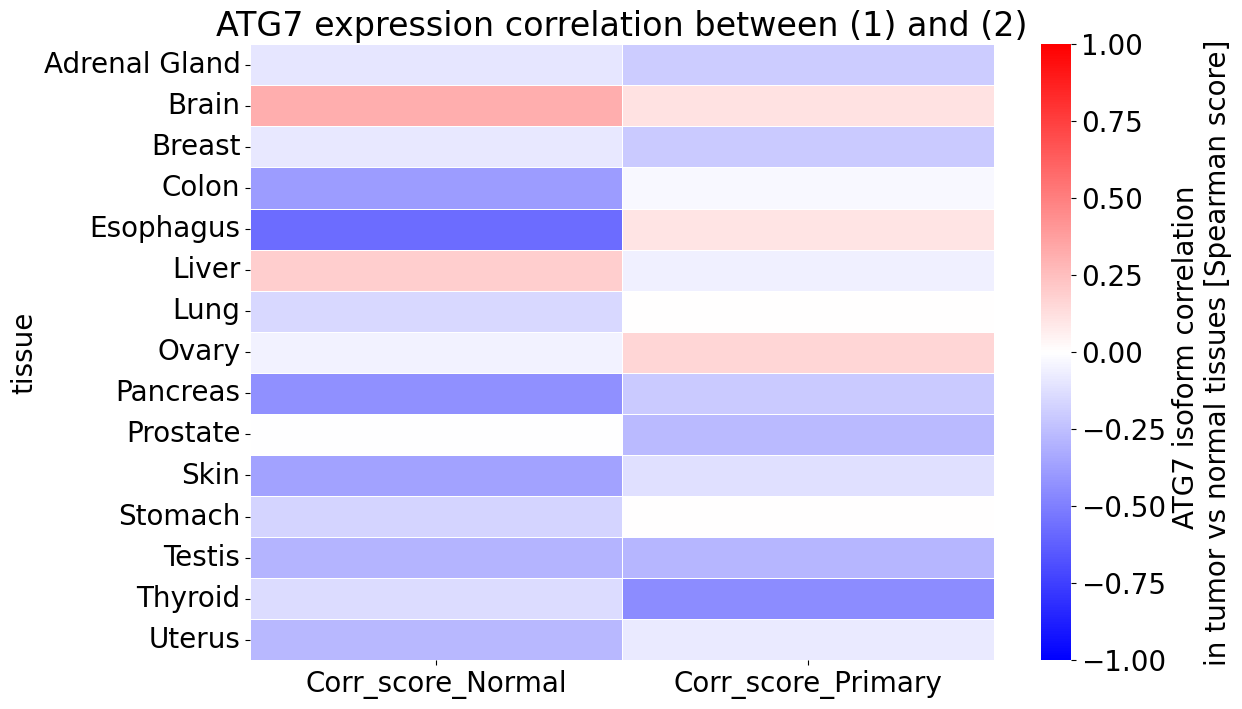

In [30]:
#Heatmap correlation
df = df_atg7_correlation_tissues

HeatMap_df = df[['Corr_score_Normal', 'Corr_score_Primary']]
HeatMap_df = HeatMap_df.astype(float)
seaborn.heatmap(HeatMap_df, annot=False, cmap="bwr", linewidths=.5, center=0, vmin=-1, vmax=1,
               cbar_kws={'label': 'ATG7 isoform correlation \nin tumor vs normal tissues [Spearman score]'})
plt.title('ATG7 expression correlation between (1) and (2)')
plt.yticks(fontsize=20)

title_file = 'Heatmap_Correlation_per_tissue_thesis'
plt.savefig(path+path2+title_file+'.svg')